In [ ]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [ ]:
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Mounted at /content/drive


# 데이터 불러오기

In [ ]:
DF_Final = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF_Final['product'] = DF_Final['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF = DF_Final.copy()

# 시간별 데이터 분석

# 1. 연도별 분석

In [ ]:
DF_year = DF_Final['year'].value_counts()

In [ ]:
DF_year

year
2023    403211
2022    266755
2021    185328
2020    163218
2019    118063
2018    110677
2024     79289
Name: count, dtype: int64

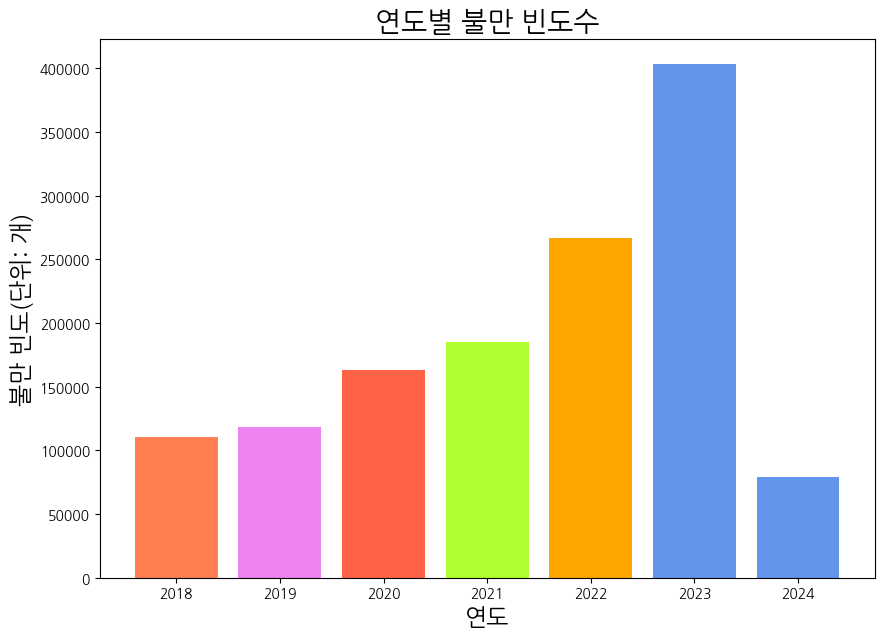

In [ ]:
color = ['cornflowerblue','orange','greenyellow','tomato','violet','coral']
plt.figure(figsize = (10, 7))
plt.bar(DF_year.index,
        DF_year.values,
        color = color)
plt.title('연도별 불만 빈도수',fontsize = 20)
plt.xlabel('연도', fontsize = 17)
plt.ylabel('불만 빈도(단위: 개)', fontsize = 17)
plt.show()

1. 해당 데이터로 연도별 빈도수를 본 결과, 2022>2023년에 갑작스런 증가가 나타난 것이 아니고, 연도를 거듭하면서 지속적인 증가 추세를 보였다.
2. 그렇다면 계속해서 증가한 이유가 뭘까? 코로나를 기점으로 온라인 은행 서비스 및 디지털 자산에 대한 수요가 증가했고 이로 인해 은행 리뷰의 증가 추세?
3. 계속된 CFPB의 규제 대상 범위가 확대됨에 따라 고객들이 은행 서비스와 관련된 불만을 제기하는 경향이 증가?
4. 2023년 파산때문?/ 2022년 부터 높아진 금리 >>연체율 증가
5. 기본적으로 증가하는 양상을 보이는 것이 맞다.

 1) 금융상품 고객은 계속해서 증가하기 때문이기도 하고, CFPB에서 자료를 수집하는 방법 혹은 범위 등을 계속해서 넓혀가고 있기 때문(ex. 비은행 금융기업 규제, 디지털자산(코인) 등)

1. 2019 - 2022년과 비교했을때 2023년의 매우 높은 불만 빈도

 1) 사용 데이터는 2019 - 2024/04/11까지의 데이터로 2024년의 빈도를 봤을때, 2023년과 비슷하거나 그 이상의 양상을 보여줄 것으로 예상된다.

 2) 코로나 기간은 2020 - 2021 더 길게보면 2022년까지로 낮을 수 있을 것 같지만, 2019년이 낮은 이유는 추가적인 자료 수집이 필요할 것으로 보인다.

In [ ]:
DF_2018V = DF[DF['year'] == 2018]['product'].value_counts()
DF_2019V = DF[DF['year'] == 2019]['product'].value_counts()
DF_2020V = DF[DF['year'] == 2020]['product'].value_counts()
DF_2021V = DF[DF['year'] == 2021]['product'].value_counts()
DF_2022V = DF[DF['year'] == 2022]['product'].value_counts()
DF_2023V = DF[DF['year'] == 2023]['product'].value_counts()
DF_2024V = DF[DF['year'] == 2024]['product'].value_counts()

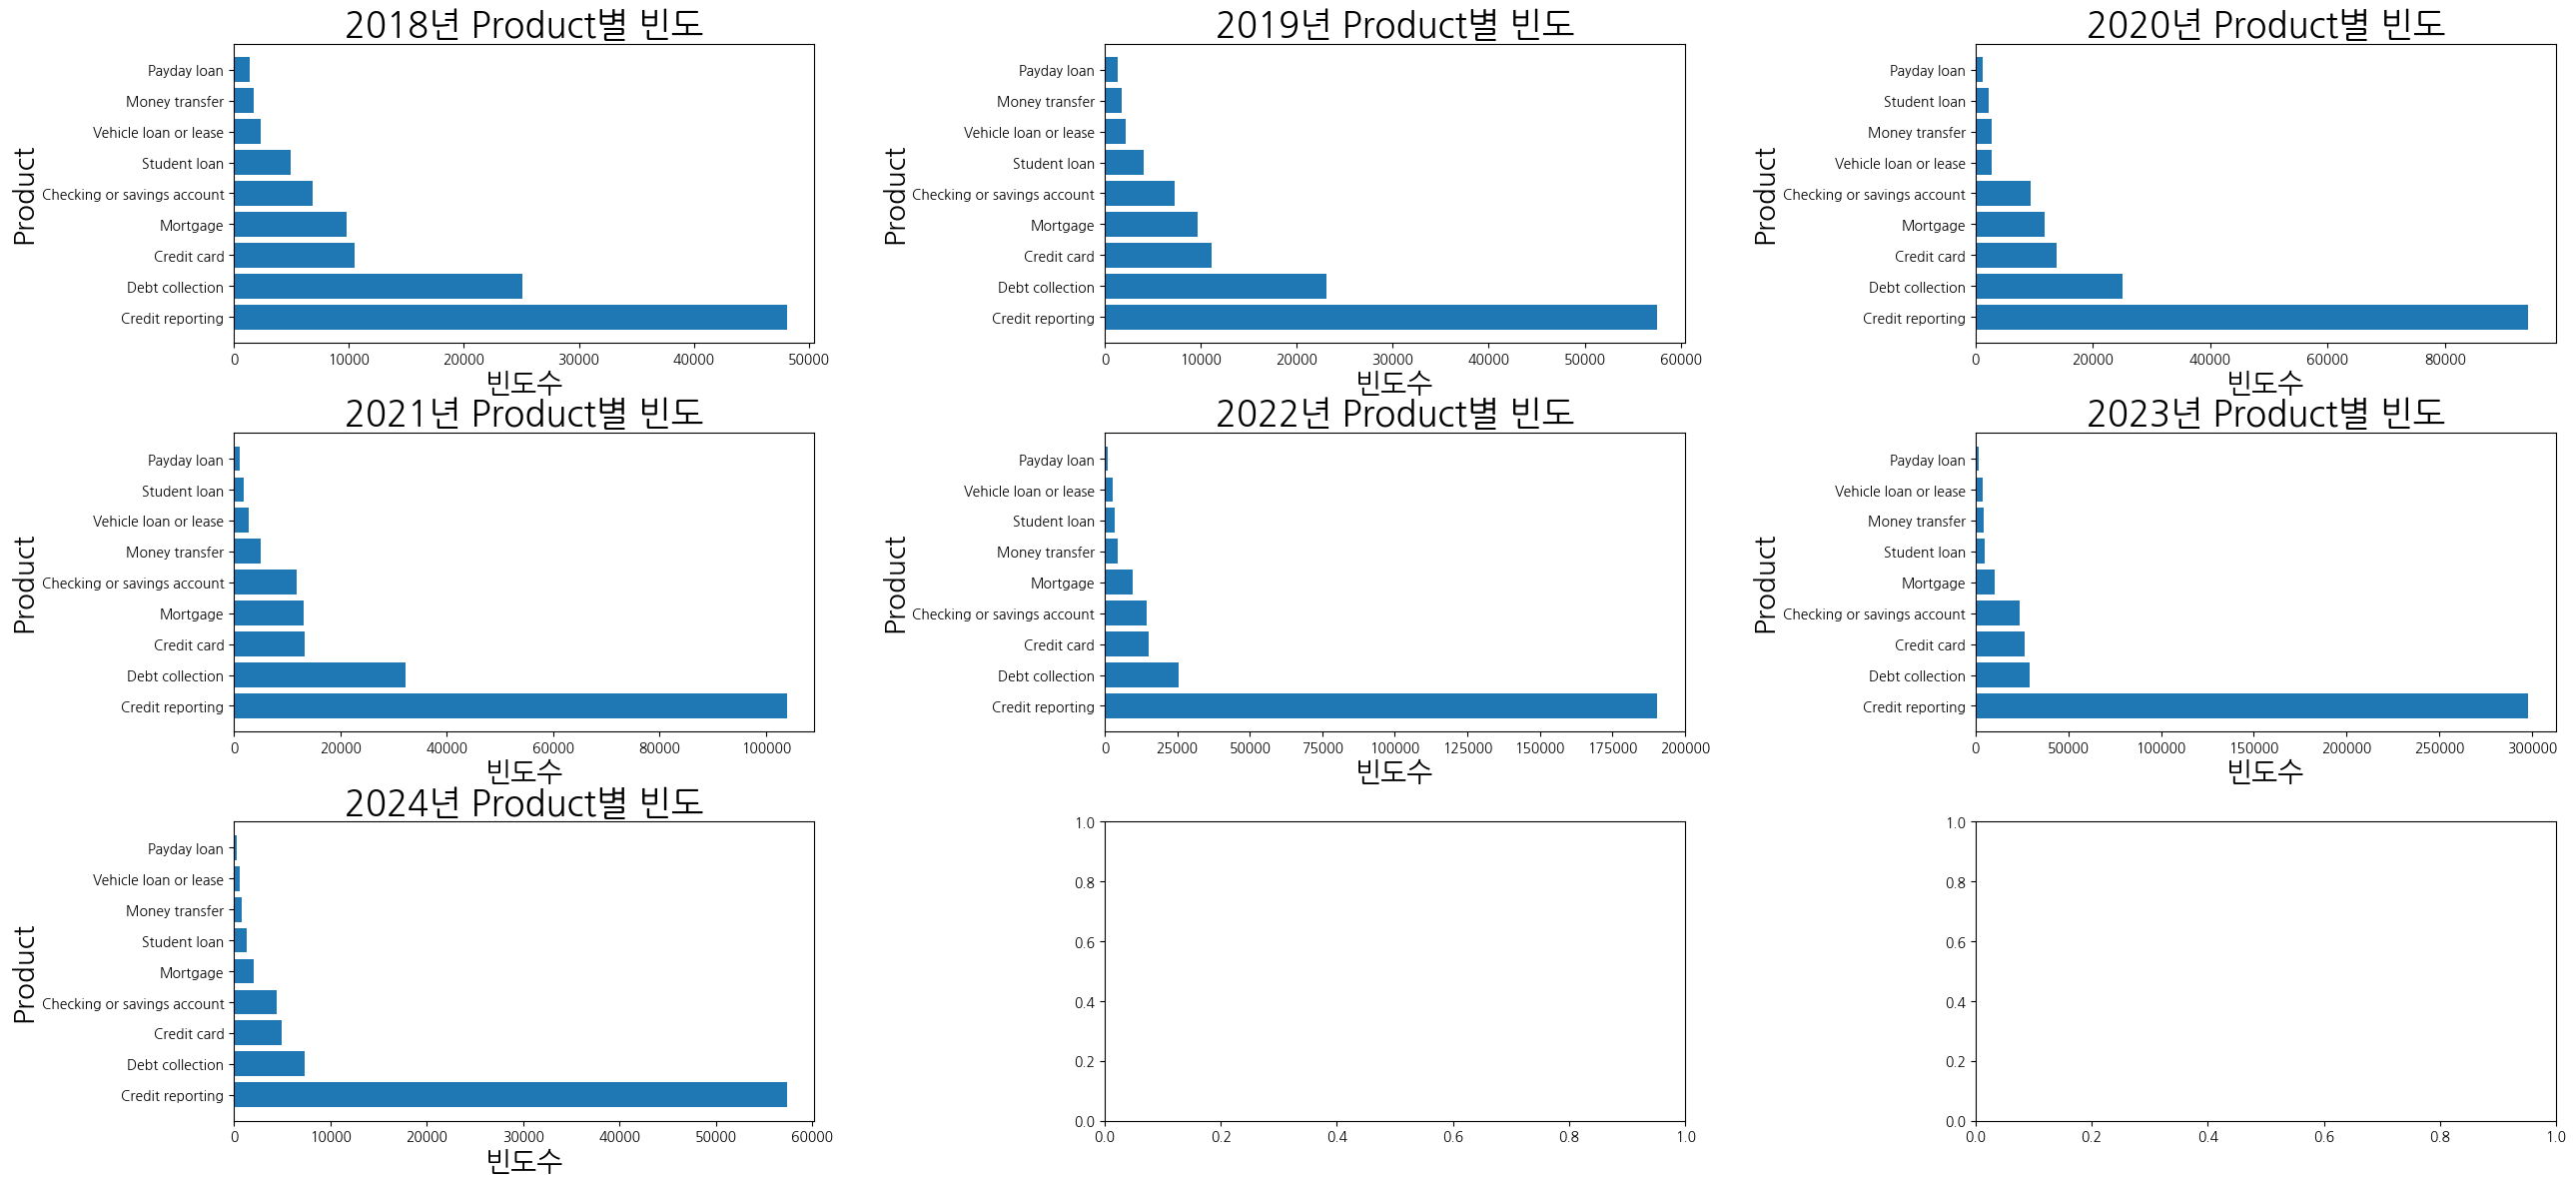

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 14))
fig.subplots_adjust(wspace=0.5, hspace=0.3) # 그래프 사이 간격 조절(0~1)

ax[0,0].barh(DF_2018V.index,
        DF_2018V.values)
ax[0,1].barh(DF_2019V.index,
        DF_2019V.values)
ax[0,2].barh(DF_2020V.index,
        DF_2020V.values)
ax[1,0].barh(DF_2021V.index,
        DF_2021V.values)
ax[1,1].barh(DF_2022V.index,
        DF_2022V.values)
ax[1,2].barh(DF_2023V.index,
        DF_2023V.values)
ax[2,0].barh(DF_2024V.index,
        DF_2024V.values)

ax[0,0].set_title('2018년 Product별 빈도', size = 25)
ax[0,1].set_title('2019년 Product별 빈도', size = 25)
ax[0,2].set_title('2020년 Product별 빈도', size = 25)
ax[1,0].set_title('2021년 Product별 빈도', size = 25)
ax[1,1].set_title('2022년 Product별 빈도', size = 25)
ax[1,2].set_title('2023년 Product별 빈도', size = 25)
ax[2,0].set_title('2024년 Product별 빈도', size = 25)

ax[0,0].set_xlabel('빈도수',fontsize = 20)
ax[0,1].set_xlabel('빈도수',fontsize = 20)
ax[0,2].set_xlabel('빈도수',fontsize = 20)
ax[1,0].set_xlabel('빈도수',fontsize = 20)
ax[1,1].set_xlabel('빈도수',fontsize = 20)
ax[1,2].set_xlabel('빈도수',fontsize = 20)
ax[2,0].set_xlabel('빈도수',fontsize = 20)

ax[0,0].set_ylabel('Product',fontsize = 20)
ax[0,1].set_ylabel('Product',fontsize = 20)
ax[0,2].set_ylabel('Product',fontsize = 20)
ax[1,0].set_ylabel('Product',fontsize = 20)
ax[1,1].set_ylabel('Product',fontsize = 20)
ax[1,2].set_ylabel('Product',fontsize = 20)
ax[2,0].set_ylabel('Product',fontsize = 20)

plt.show()

1. 모든 연도에 공통적으로 Credit reporting의 매우 높은 빈도를 보인다.
2. 모든 연도에 공통적으로 Debt collection이 두번째로 높은 빈도를 보인다.
3. 모든 연도에 공통적으로 Payday loan이 가장 낮은 빈도를 보인다.
* Credit reporting이 다른 product와 비교했을때 너무 높은 빈도를 보이므로 제외한 결과도 볼 수 있도록 한다.

In [ ]:
DF[DF['product'] == 'Credit reporting']['sub-product'].value_counts()

sub-product
Credit reporting                  240958
Other personal consumer report      1394
Name: count, dtype: int64

In [ ]:
DF_EC = DF[DF['product'] != 'Credit reporting']

In [ ]:
DF_2018V = DF_EC[DF_EC['year'] == 2018]['product'].value_counts()
DF_2019V = DF_EC[DF_EC['year'] == 2019]['product'].value_counts()
DF_2020V = DF_EC[DF_EC['year'] == 2020]['product'].value_counts()
DF_2021V = DF_EC[DF_EC['year'] == 2021]['product'].value_counts()
DF_2022V = DF_EC[DF_EC['year'] == 2022]['product'].value_counts()
DF_2023V = DF_EC[DF_EC['year'] == 2023]['product'].value_counts()
DF_2024V = DF_EC[DF_EC['year'] == 2024]['product'].value_counts()

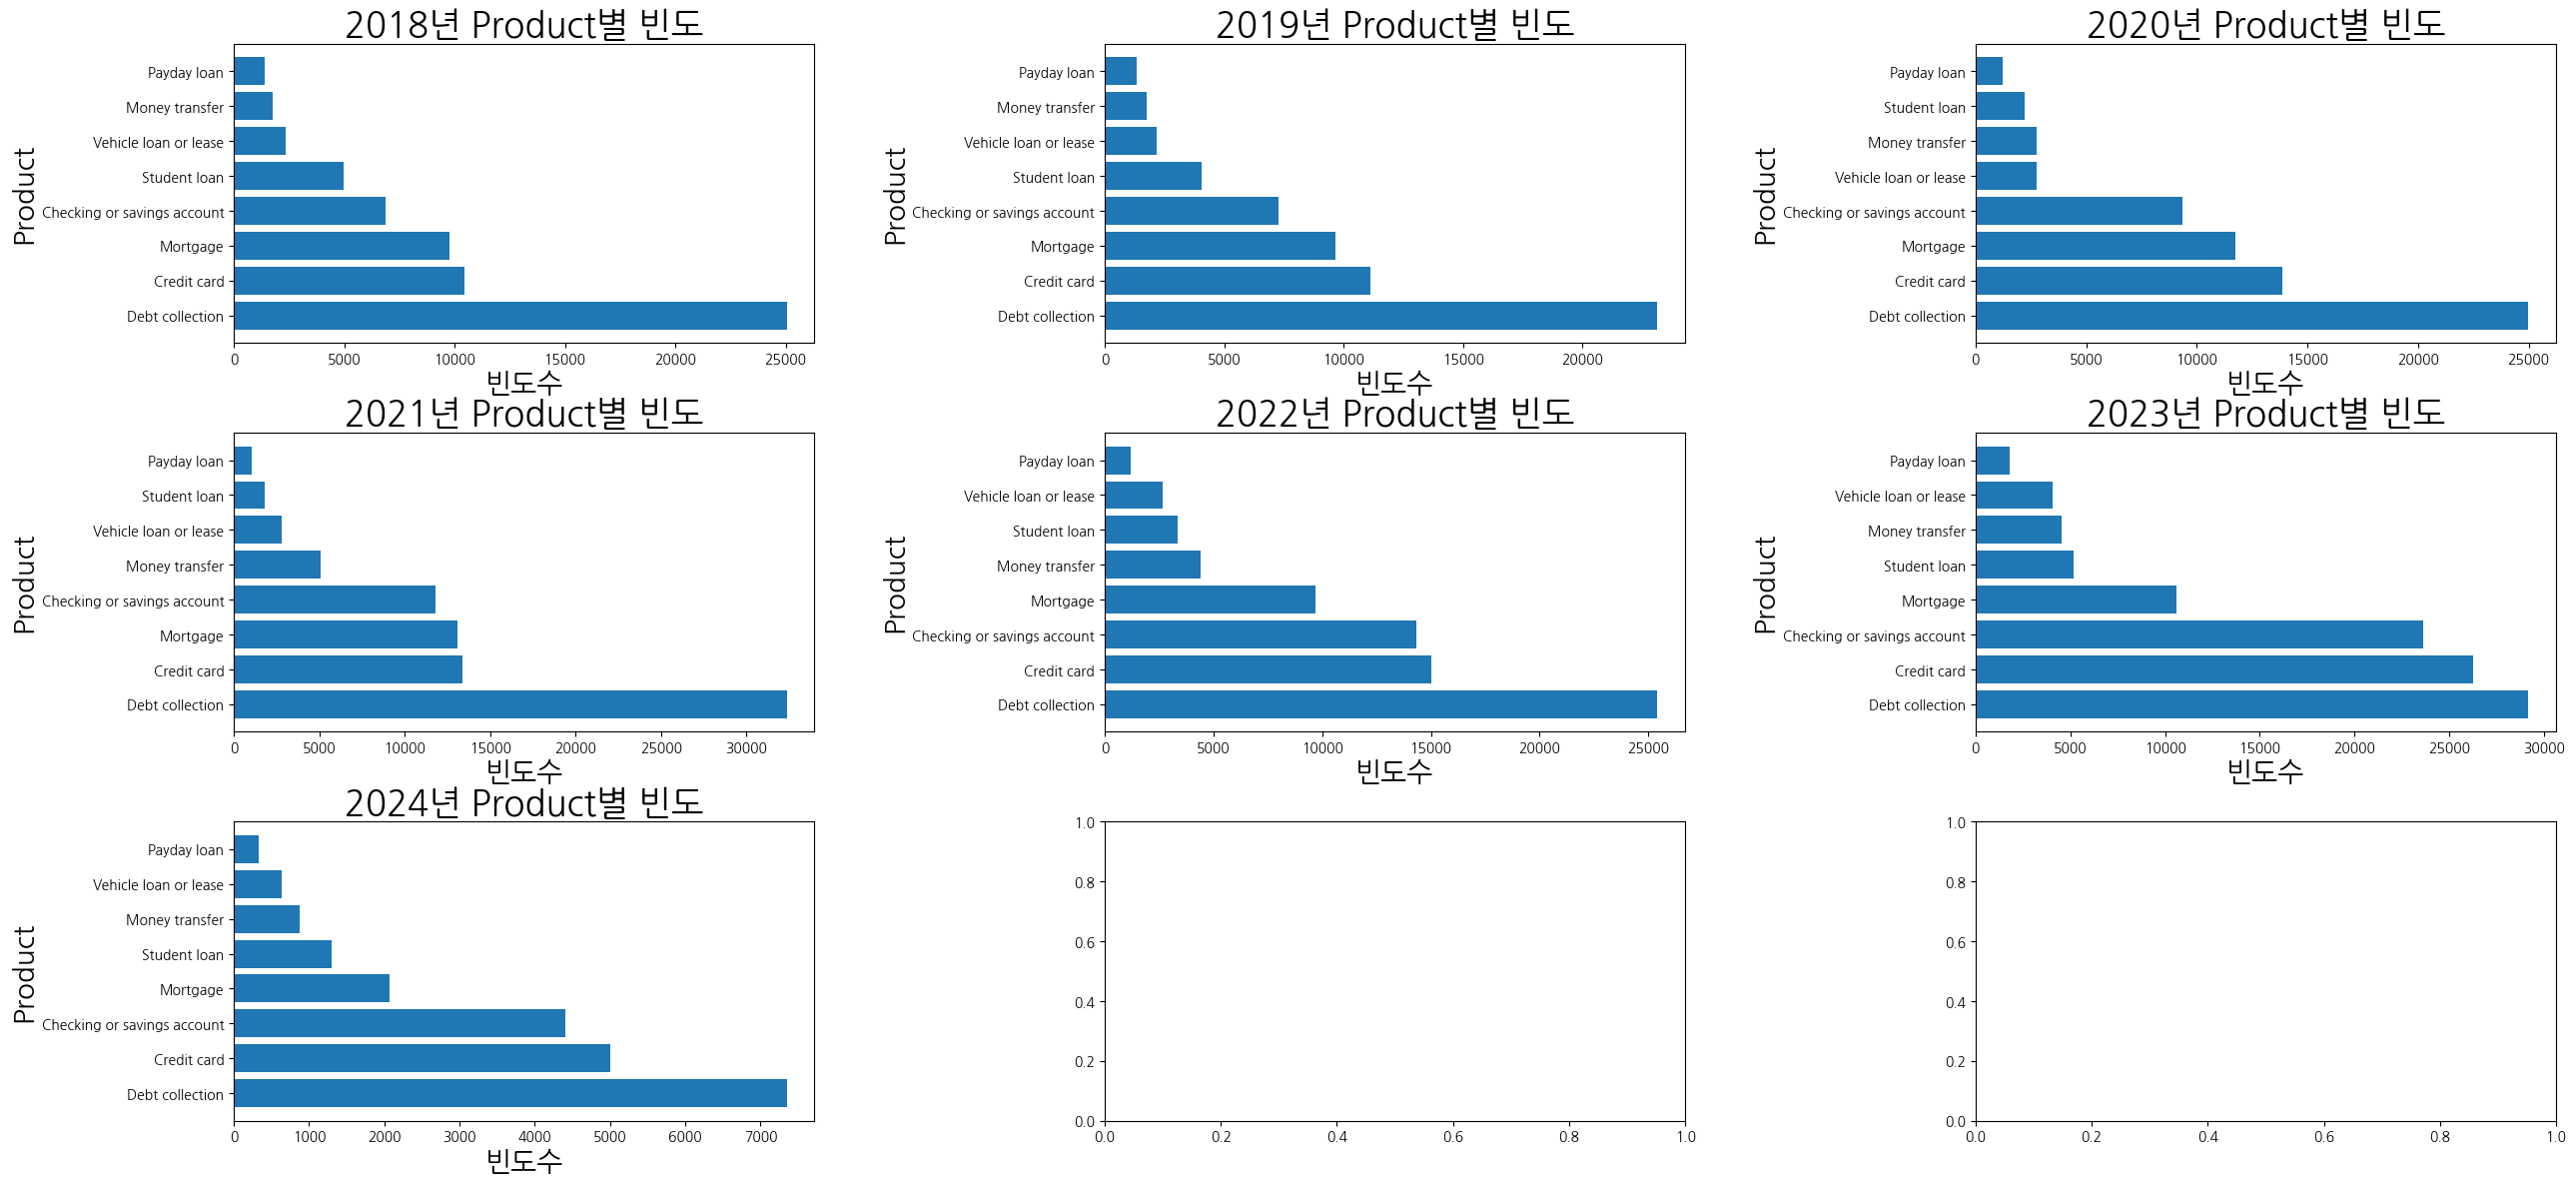

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 14))
fig.subplots_adjust(wspace=0.5, hspace=0.3) # 그래프 사이 간격 조절(0~1)

ax[0,0].barh(DF_2018V.index,
        DF_2018V.values)
ax[0,1].barh(DF_2019V.index,
        DF_2019V.values)
ax[0,2].barh(DF_2020V.index,
        DF_2020V.values)
ax[1,0].barh(DF_2021V.index,
        DF_2021V.values)
ax[1,1].barh(DF_2022V.index,
        DF_2022V.values)
ax[1,2].barh(DF_2023V.index,
        DF_2023V.values)
ax[2,0].barh(DF_2024V.index,
        DF_2024V.values)

ax[0,0].set_title('2018년 Product별 빈도', size = 25)
ax[0,1].set_title('2019년 Product별 빈도', size = 25)
ax[0,2].set_title('2020년 Product별 빈도', size = 25)
ax[1,0].set_title('2021년 Product별 빈도', size = 25)
ax[1,1].set_title('2022년 Product별 빈도', size = 25)
ax[1,2].set_title('2023년 Product별 빈도', size = 25)
ax[2,0].set_title('2024년 Product별 빈도', size = 25)

ax[0,0].set_xlabel('빈도수',fontsize = 20)
ax[0,1].set_xlabel('빈도수',fontsize = 20)
ax[0,2].set_xlabel('빈도수',fontsize = 20)
ax[1,0].set_xlabel('빈도수',fontsize = 20)
ax[1,1].set_xlabel('빈도수',fontsize = 20)
ax[1,2].set_xlabel('빈도수',fontsize = 20)
ax[2,0].set_xlabel('빈도수',fontsize = 20)

ax[0,0].set_ylabel('Product',fontsize = 20)
ax[0,1].set_ylabel('Product',fontsize = 20)
ax[0,2].set_ylabel('Product',fontsize = 20)
ax[1,0].set_ylabel('Product',fontsize = 20)
ax[1,1].set_ylabel('Product',fontsize = 20)
ax[1,2].set_ylabel('Product',fontsize = 20)
ax[2,0].set_ylabel('Product',fontsize = 20)

plt.show()

1. 2022 > 2023에서 Checking or saving account과 Credit card이 차지하는 비율이 눈에 띄게 증가하였다.


# 2.월별 분석

## 1) 단순 월별 빈도

In [ ]:
DF_2018M = DF[DF['year'] == 2018]['month'].value_counts()
DF_2019M = DF[DF['year'] == 2019]['month'].value_counts()
DF_2020M = DF[DF['year'] == 2020]['month'].value_counts()
DF_2021M = DF[DF['year'] == 2021]['month'].value_counts()
DF_2022M = DF[DF['year'] == 2022]['month'].value_counts()
DF_2023M = DF[DF['year'] == 2023]['month'].value_counts()
DF_2024M = DF[DF['year'] == 2024]['month'].value_counts()

In [ ]:
DF_2019M

month
8     11455
10    10998
7     10604
6     10108
3      9827
5      9803
9      9762
11     9723
4      9568
12     9124
2      9006
1      8085
Name: count, dtype: int64

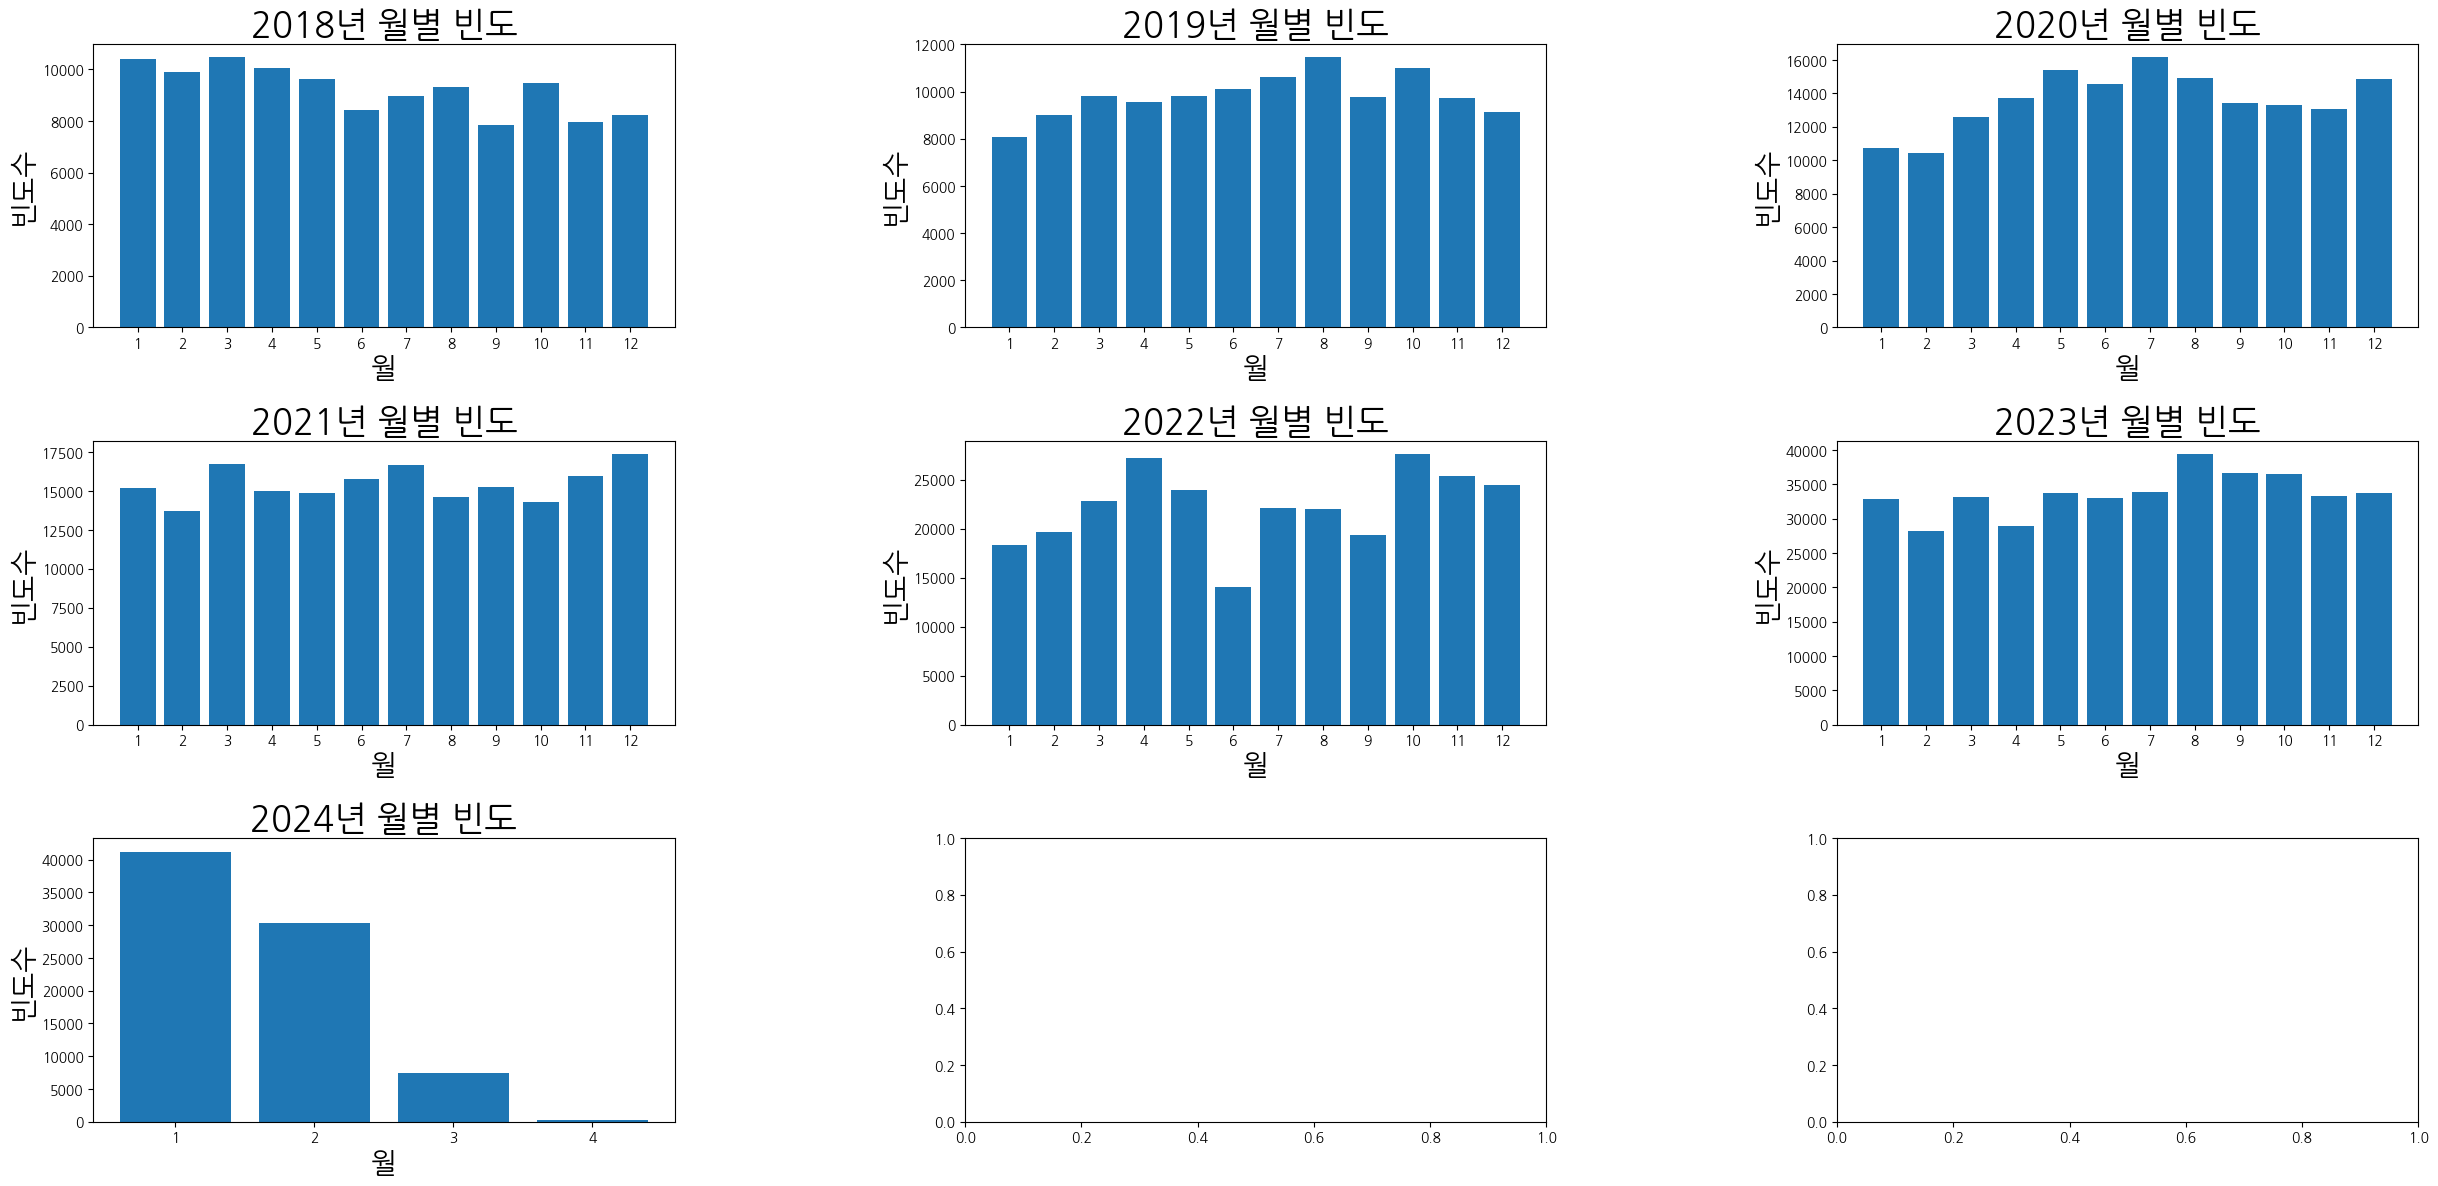

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 14))
fig.subplots_adjust(wspace=0.5, hspace=0.4) # 그래프 사이 간격 조절(0~1)

ax[0,0].bar(DF_2018M.index,
        DF_2018M.values)
ax[0,1].bar(DF_2019M.index,
        DF_2019M.values)
ax[0,2].bar(DF_2020M.index,
        DF_2020M.values)
ax[1,0].bar(DF_2021M.index,
        DF_2021M.values)
ax[1,1].bar(DF_2022M.index,
        DF_2022M.values)
ax[1,2].bar(DF_2023M.index,
        DF_2023M.values)
ax[2,0].bar(DF_2024M.index,
        DF_2024M.values)

ax[0,0].set_title('2018년 월별 빈도', size = 25)
ax[0,1].set_title('2019년 월별 빈도', size = 25)
ax[0,2].set_title('2020년 월별 빈도', size = 25)
ax[1,0].set_title('2021년 월별 빈도', size = 25)
ax[1,1].set_title('2022년 월별 빈도', size = 25)
ax[1,2].set_title('2023년 월별 빈도', size = 25)
ax[2,0].set_title('2024년 월별 빈도', size = 25)

ax[0,0].set_xlabel('월',fontsize = 20)
ax[0,1].set_xlabel('월',fontsize = 20)
ax[0,2].set_xlabel('월',fontsize = 20)
ax[1,0].set_xlabel('월',fontsize = 20)
ax[1,1].set_xlabel('월',fontsize = 20)
ax[1,2].set_xlabel('월',fontsize = 20)
ax[2,0].set_xlabel('월',fontsize = 20)

ax[0,0].set_ylabel('빈도수',fontsize = 20)
ax[0,1].set_ylabel('빈도수',fontsize = 20)
ax[0,2].set_ylabel('빈도수',fontsize = 20)
ax[1,0].set_ylabel('빈도수',fontsize = 20)
ax[1,1].set_ylabel('빈도수',fontsize = 20)
ax[1,2].set_ylabel('빈도수',fontsize = 20)
ax[2,0].set_ylabel('빈도수',fontsize = 20)

ax[0,0].set_xticks(DF_2018M.index,DF_2018M.index)
ax[0,1].set_xticks(DF_2019M.index,DF_2019M.index)
ax[0,2].set_xticks(DF_2019M.index,DF_2019M.index)
ax[1,0].set_xticks(DF_2019M.index,DF_2019M.index)
ax[1,1].set_xticks(DF_2019M.index,DF_2019M.index)
ax[1,2].set_xticks(DF_2019M.index,DF_2019M.index)
ax[2,0].set_xticks(DF_2024M.index,DF_2024M.index)

plt.show()

1. 19/20/22 --> 중간 중간 빈도수가 늘어나는 월이 존재
2. 21/23 --> 상대적으로 평이한 흐름을 보임
3. 22년 10월에 미국에서 CFBP 감독 권한을 비은행 금융기업까지 확대 방안 제출 예정?
4. 2022년 9월 백악관 규제 프레임워크 발표 내용 중, 디지털자산과 관련하여 소비자불만 모니터링 강화 내용 포함

## 2)월/제품별 빈도

### (1) 2018년

In [ ]:
DF_2018M = DF[DF['year'] == 2018]
DF_2018M

In [ ]:
K = DF_2018M.groupby('month')['product'].value_counts().unstack()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K.index, ax.flatten())):
    K.loc[month].sort_values(ascending = True).plot(kind='barh', ax=ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout()
plt.show()

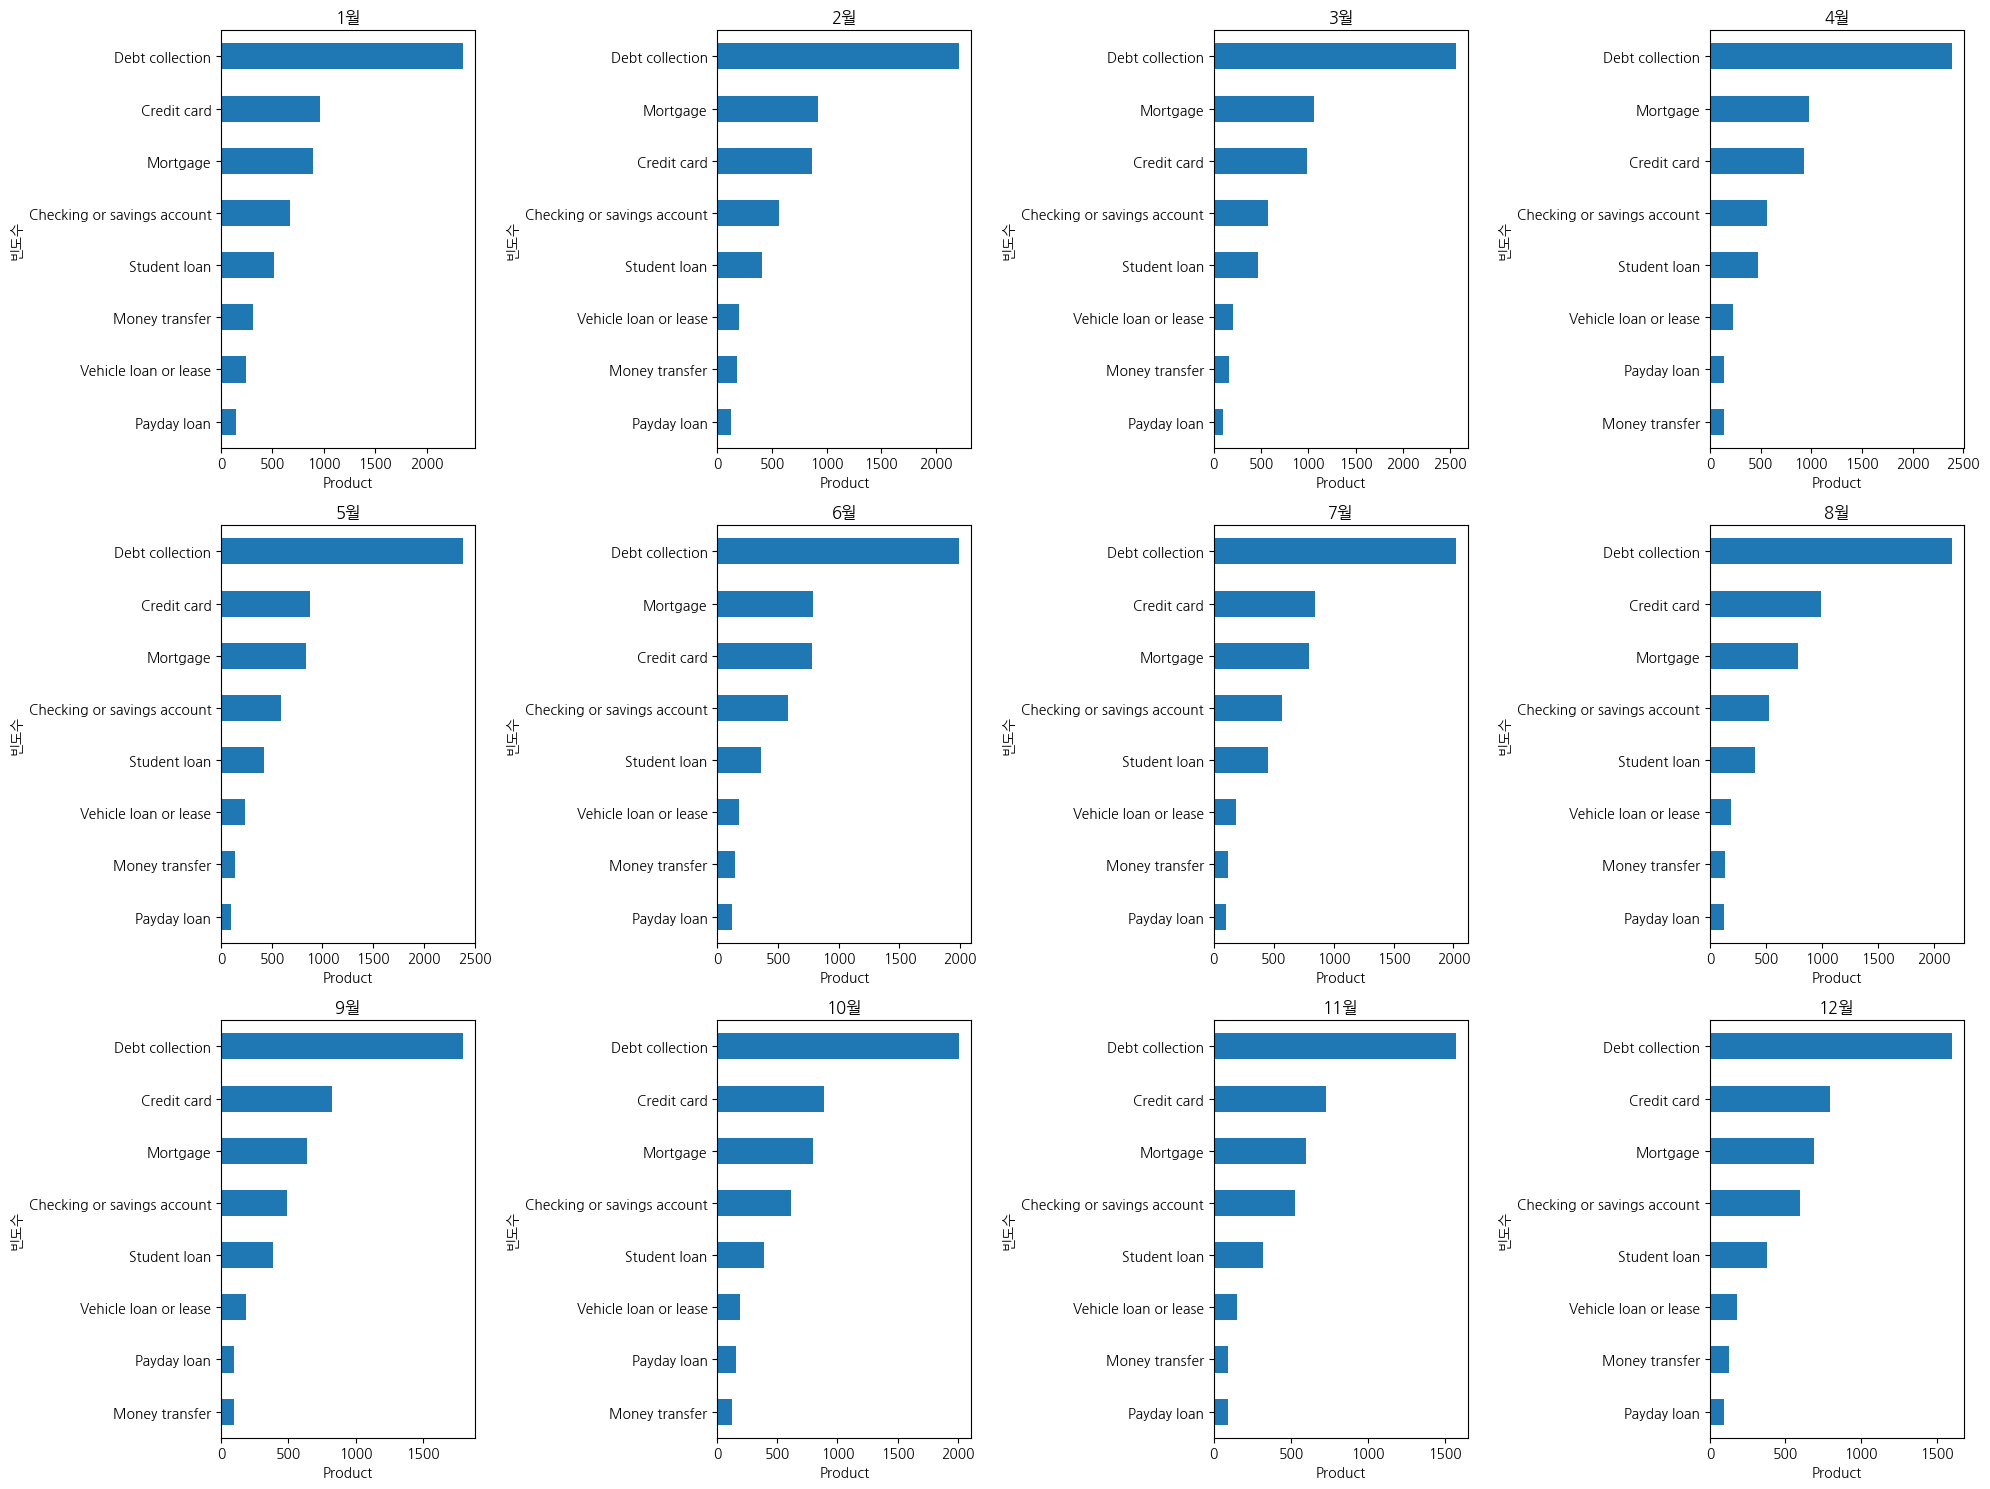

In [ ]:
# Credit reporting을 제외한 결과
K_1 = K.drop(columns = ['Credit reporting'])
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K_1.index, ax.flatten())):
    K_1.loc[month].sort_values(ascending = True).plot(kind = 'barh',ax =ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout() #그래프 간격
plt.show()

### (2) 2019년

In [ ]:
DF_2019M = DF[DF['year'] == 2019]
DF_2019M

,date received,product,sub-product,issue,sub-issue,consumer complaint narrative,company public response,company,state,zip code,...,consumer consent provided,submitted via,date sent to company,company response to consumer,timely response,consumer disputed,complaint id,year,month,day
15452,2019-08-15,Credit card,General-purpose credit card or charge card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,Paypal credit advertised 24 equal monthly paym...,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,NY,10312,...,Consent provided,Web,08/15/19,Closed with explanation,Yes,NaN,3341936.0,2019,8,15
15466,2019-09-17,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I have had Amex cards since 1997. I have had M...,NaN,AMERICAN EXPRESS COMPANY,FL,32824,...,Consent provided,Web,09/17/19,Closed with explanation,Yes,NaN,3376965.0,2019,9,17
15468,2019-11-05,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,Discover Card failed to properly credit a paym...,NaN,DISCOVER BANK,CA,91356,...,Consent provided,Web,11/05/19,Closed with explanation,Yes,NaN,3429318.0,2019,11,5
15477,2019-10-29,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,The XXXX Visa Card ( offered through Barclay '...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,IL,60608,...,Consent provided,Web,10/29/19,Closed with explanation,Yes,NaN,3420712.0,2019,10,29
15479,2019-09-28,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I disputed a charge made on a Chase credit car...,NaN,JPMORGAN CHASE & CO.,OH,43065,...,Consent provided,Web,09/28/19,Closed with monetary relief,Yes,NaN,3389508.0,2019,9,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324603,2019-12-31,Checking or savings account,Checking account,Opening an account,Unable to open an account,Not able to open account,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,GA,30310,...,Consent provided,Web,12/31/19,Closed with explanation,Yes,NaN,3482247.0,2019,12,31
1325541,2019-05-28,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,"On the Thursday of XX/XX/XXXX, I walked into m...",NaN,JPMORGAN CHASE & CO.,FL,32818,...,Consent provided,Web,05/28/19,Closed with explanation,Yes,NaN,3256197.0,2019,5,28
1326293,2019-05-28,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,i have checking account with XXXX XXXX XXXX ac...,NaN,PNC Bank N.A.,CA,92804,...,Consent provided,Web,05/28/19,Closed with explanation,Yes,NaN,3255157.0,2019,5,28
1326396,2019-10-19,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,"""XXXX XXXX"" BRANCH MANAGER IS REFUSING ME ACC...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,601XX,...,Consent provided,Web,10/19/19,Closed with explanation,Yes,NaN,3411329.0,2019,10,19


In [ ]:
K = DF_2019M.groupby('month')['product'].value_counts().unstack()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K.index, ax.flatten())):
    K.loc[month].sort_values(ascending = True).plot(kind='barh', ax=ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout()
plt.show()

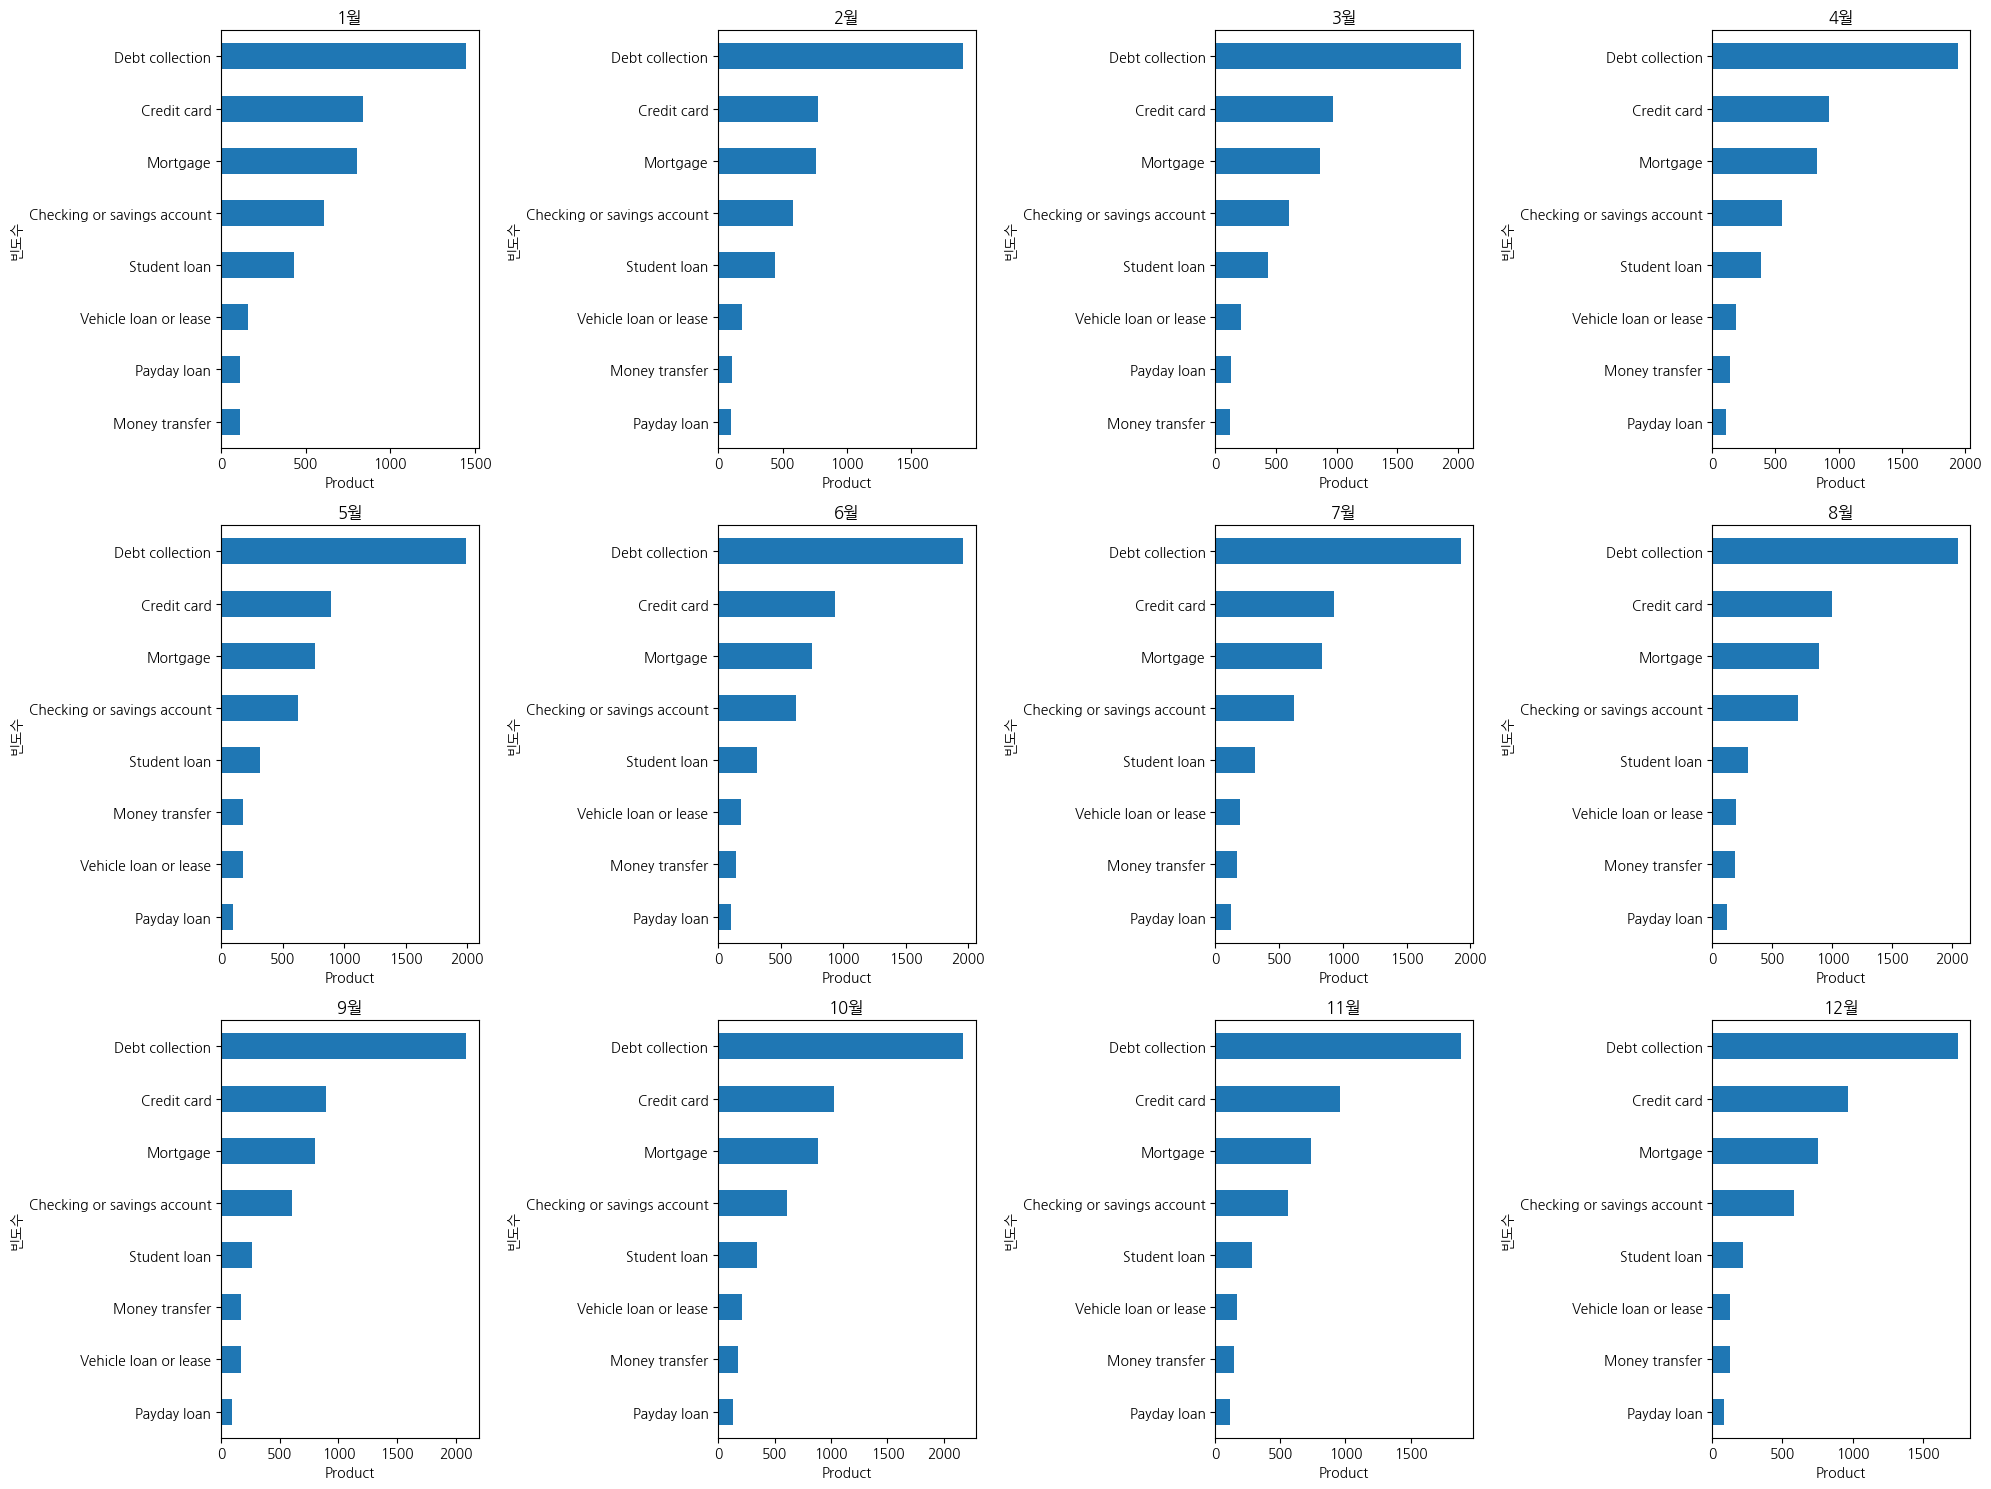

In [ ]:
# Credit reporting을 제외한 결과
K_1 = K.drop(columns = ['Credit reporting'])
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K_1.index, ax.flatten())):
    K_1.loc[month].sort_values(ascending = True).plot(kind = 'barh',ax =ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout() #그래프 간격
plt.show()

### (3) 2020년

In [ ]:
DF_2020M = DF[DF['year'] == 2020]

In [ ]:
K = DF_2020M.groupby('month')['product'].value_counts().unstack()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K.index, ax.flatten())):
    K.loc[month].sort_values(ascending = True).plot(kind='barh', ax=ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout()
plt.show()

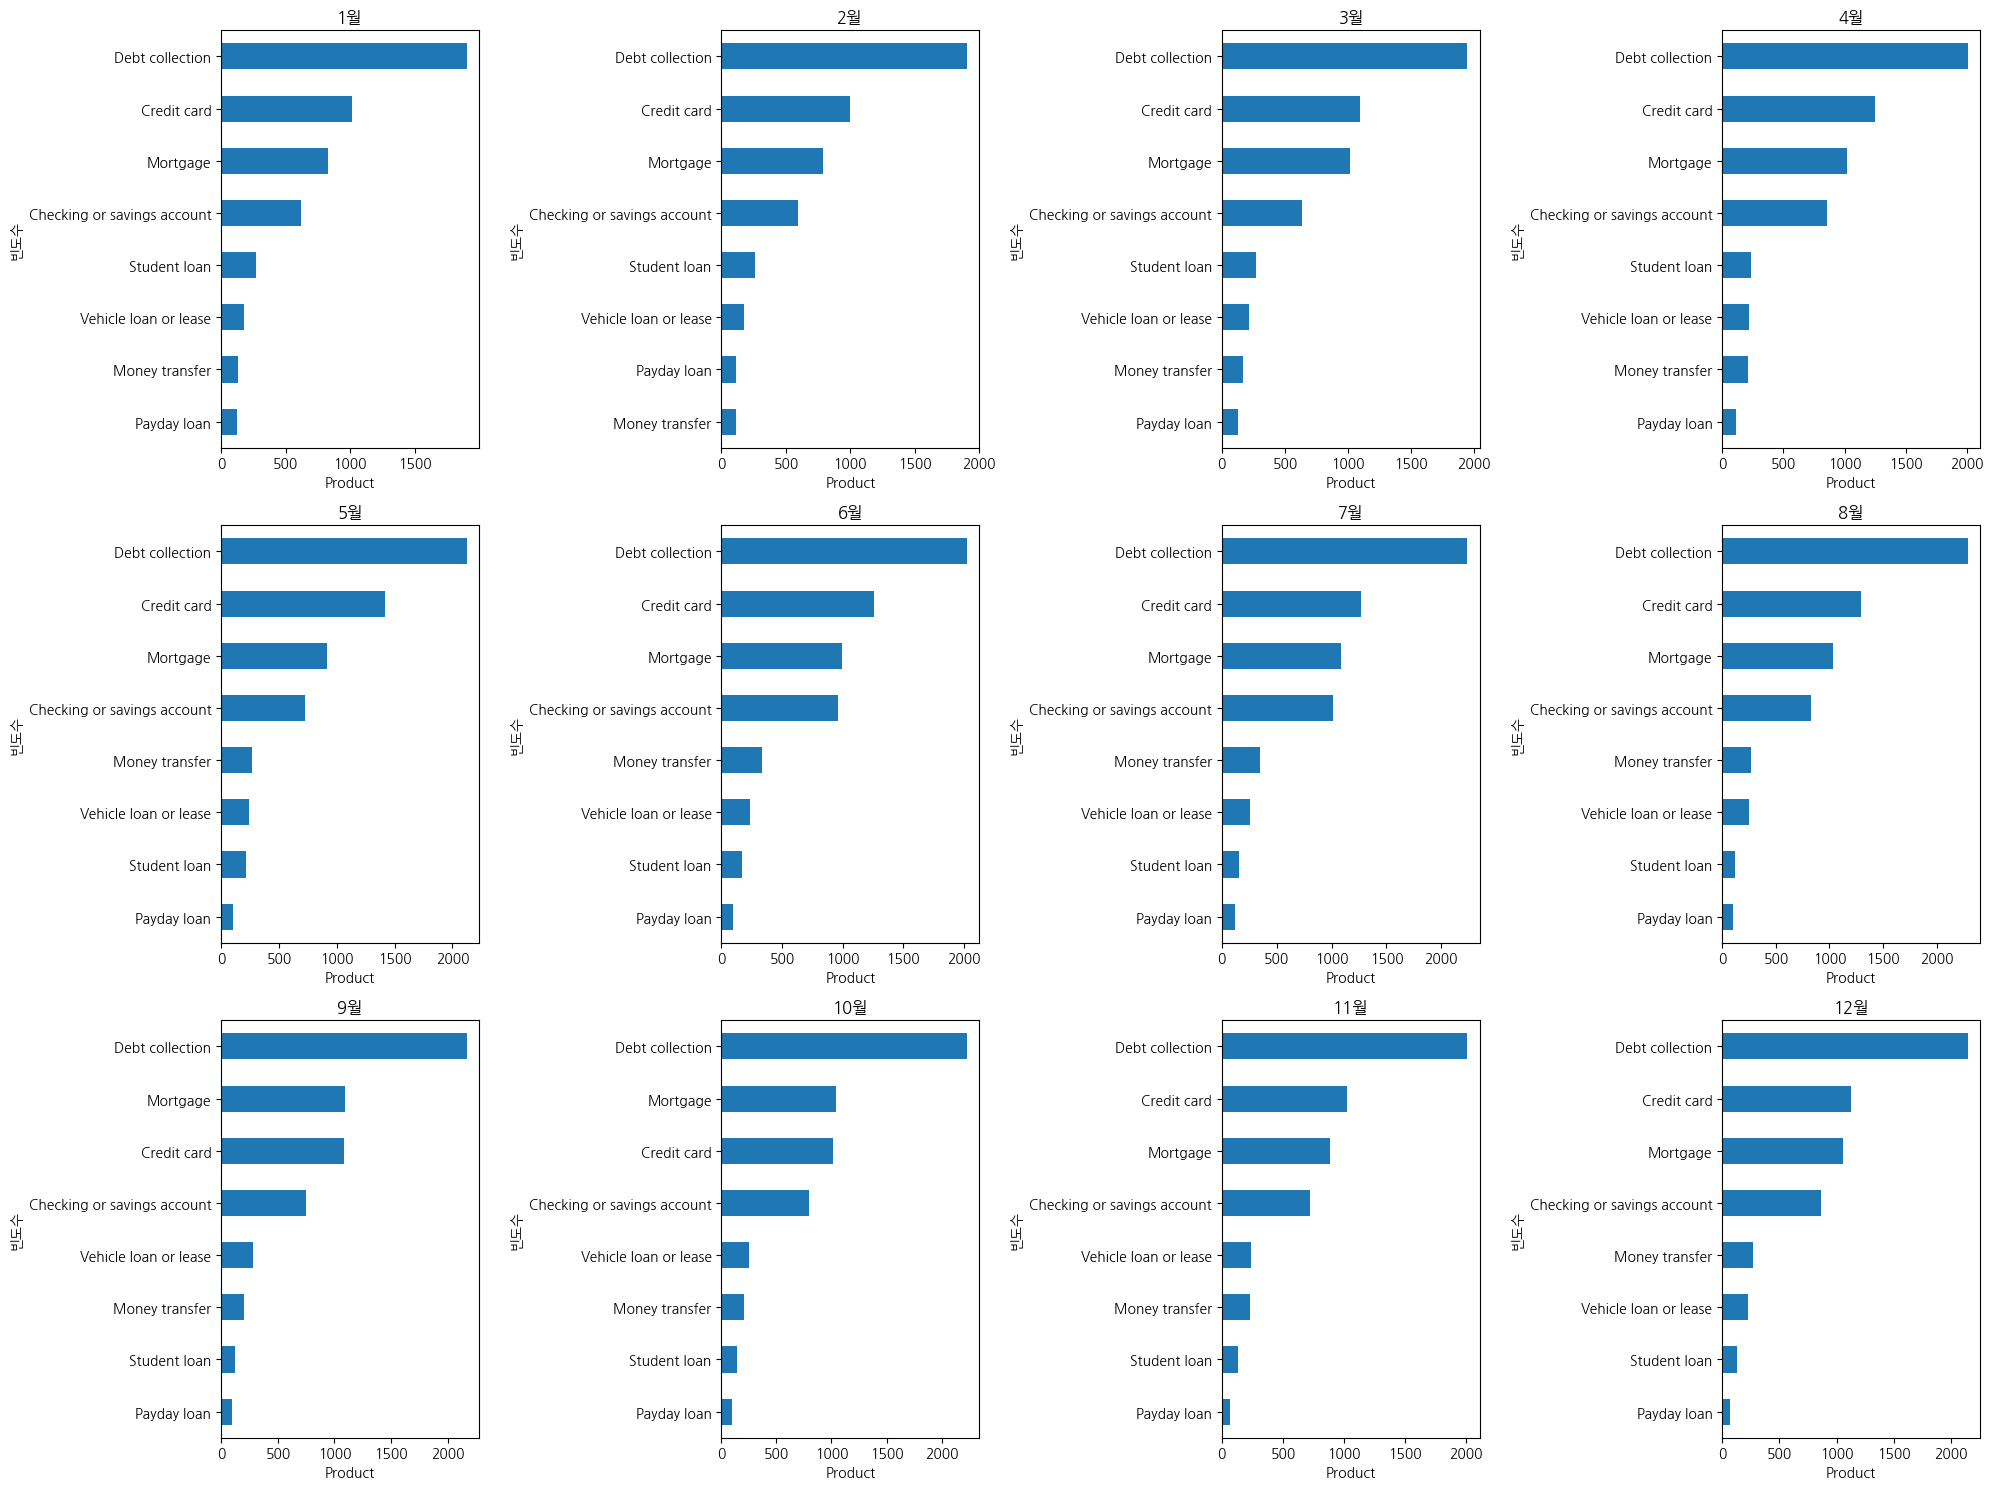

In [ ]:
# Credit reporting을 제외한 결과
K_1 = K.drop(columns = ['Credit reporting'])
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K_1.index, ax.flatten())):
    K_1.loc[month].sort_values(ascending = True).plot(kind = 'barh',ax =ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout() #그래프 간격
plt.show()

### (4) 2021년

In [ ]:
DF_2021M = DF[DF['year'] == 2021]

In [ ]:
K = DF_2021M.groupby('month')['product'].value_counts().unstack()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K.index, ax.flatten())):
    K.loc[month].sort_values(ascending = True).plot(kind='barh', ax=ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout()
plt.show()

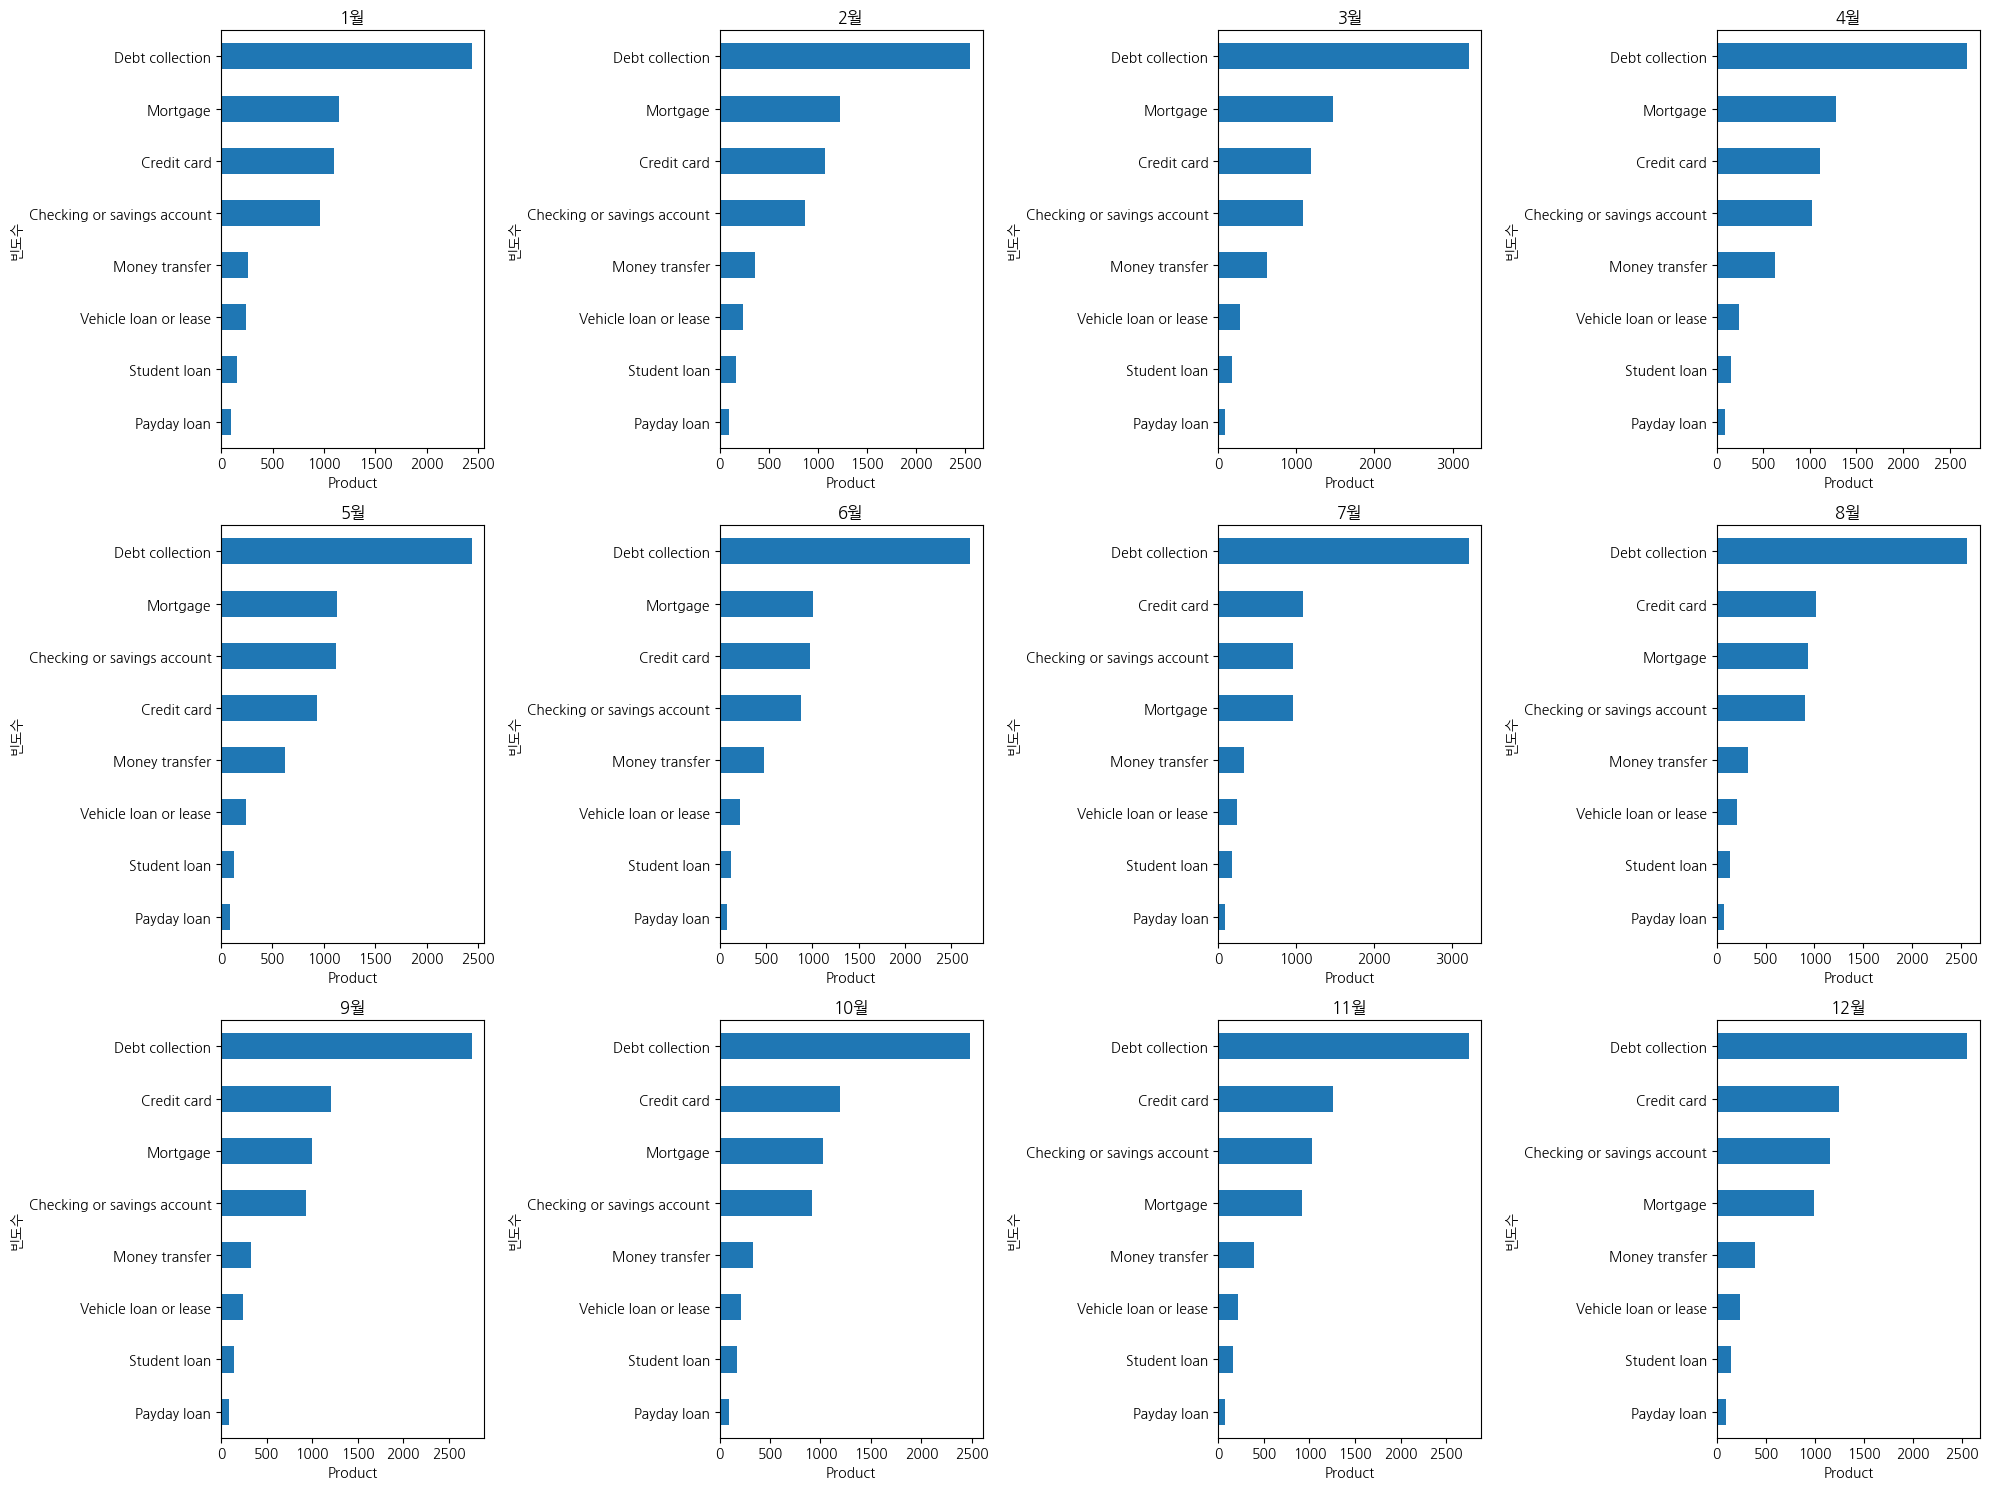

In [ ]:
# Credit reporting을 제외한 결과
K_1 = K.drop(columns = ['Credit reporting'])
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K_1.index, ax.flatten())):
    K_1.loc[month].sort_values(ascending = True).plot(kind = 'barh',ax =ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout() #그래프 간격
plt.show()

### (5) 2022년

In [ ]:
DF_2022M = DF[DF['year'] == 2022]

In [ ]:
K = DF_2022M.groupby('month')['product'].value_counts().unstack()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K.index, ax.flatten())):
    K.loc[month].sort_values(ascending = True).plot(kind='barh', ax=ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout()
plt.show()

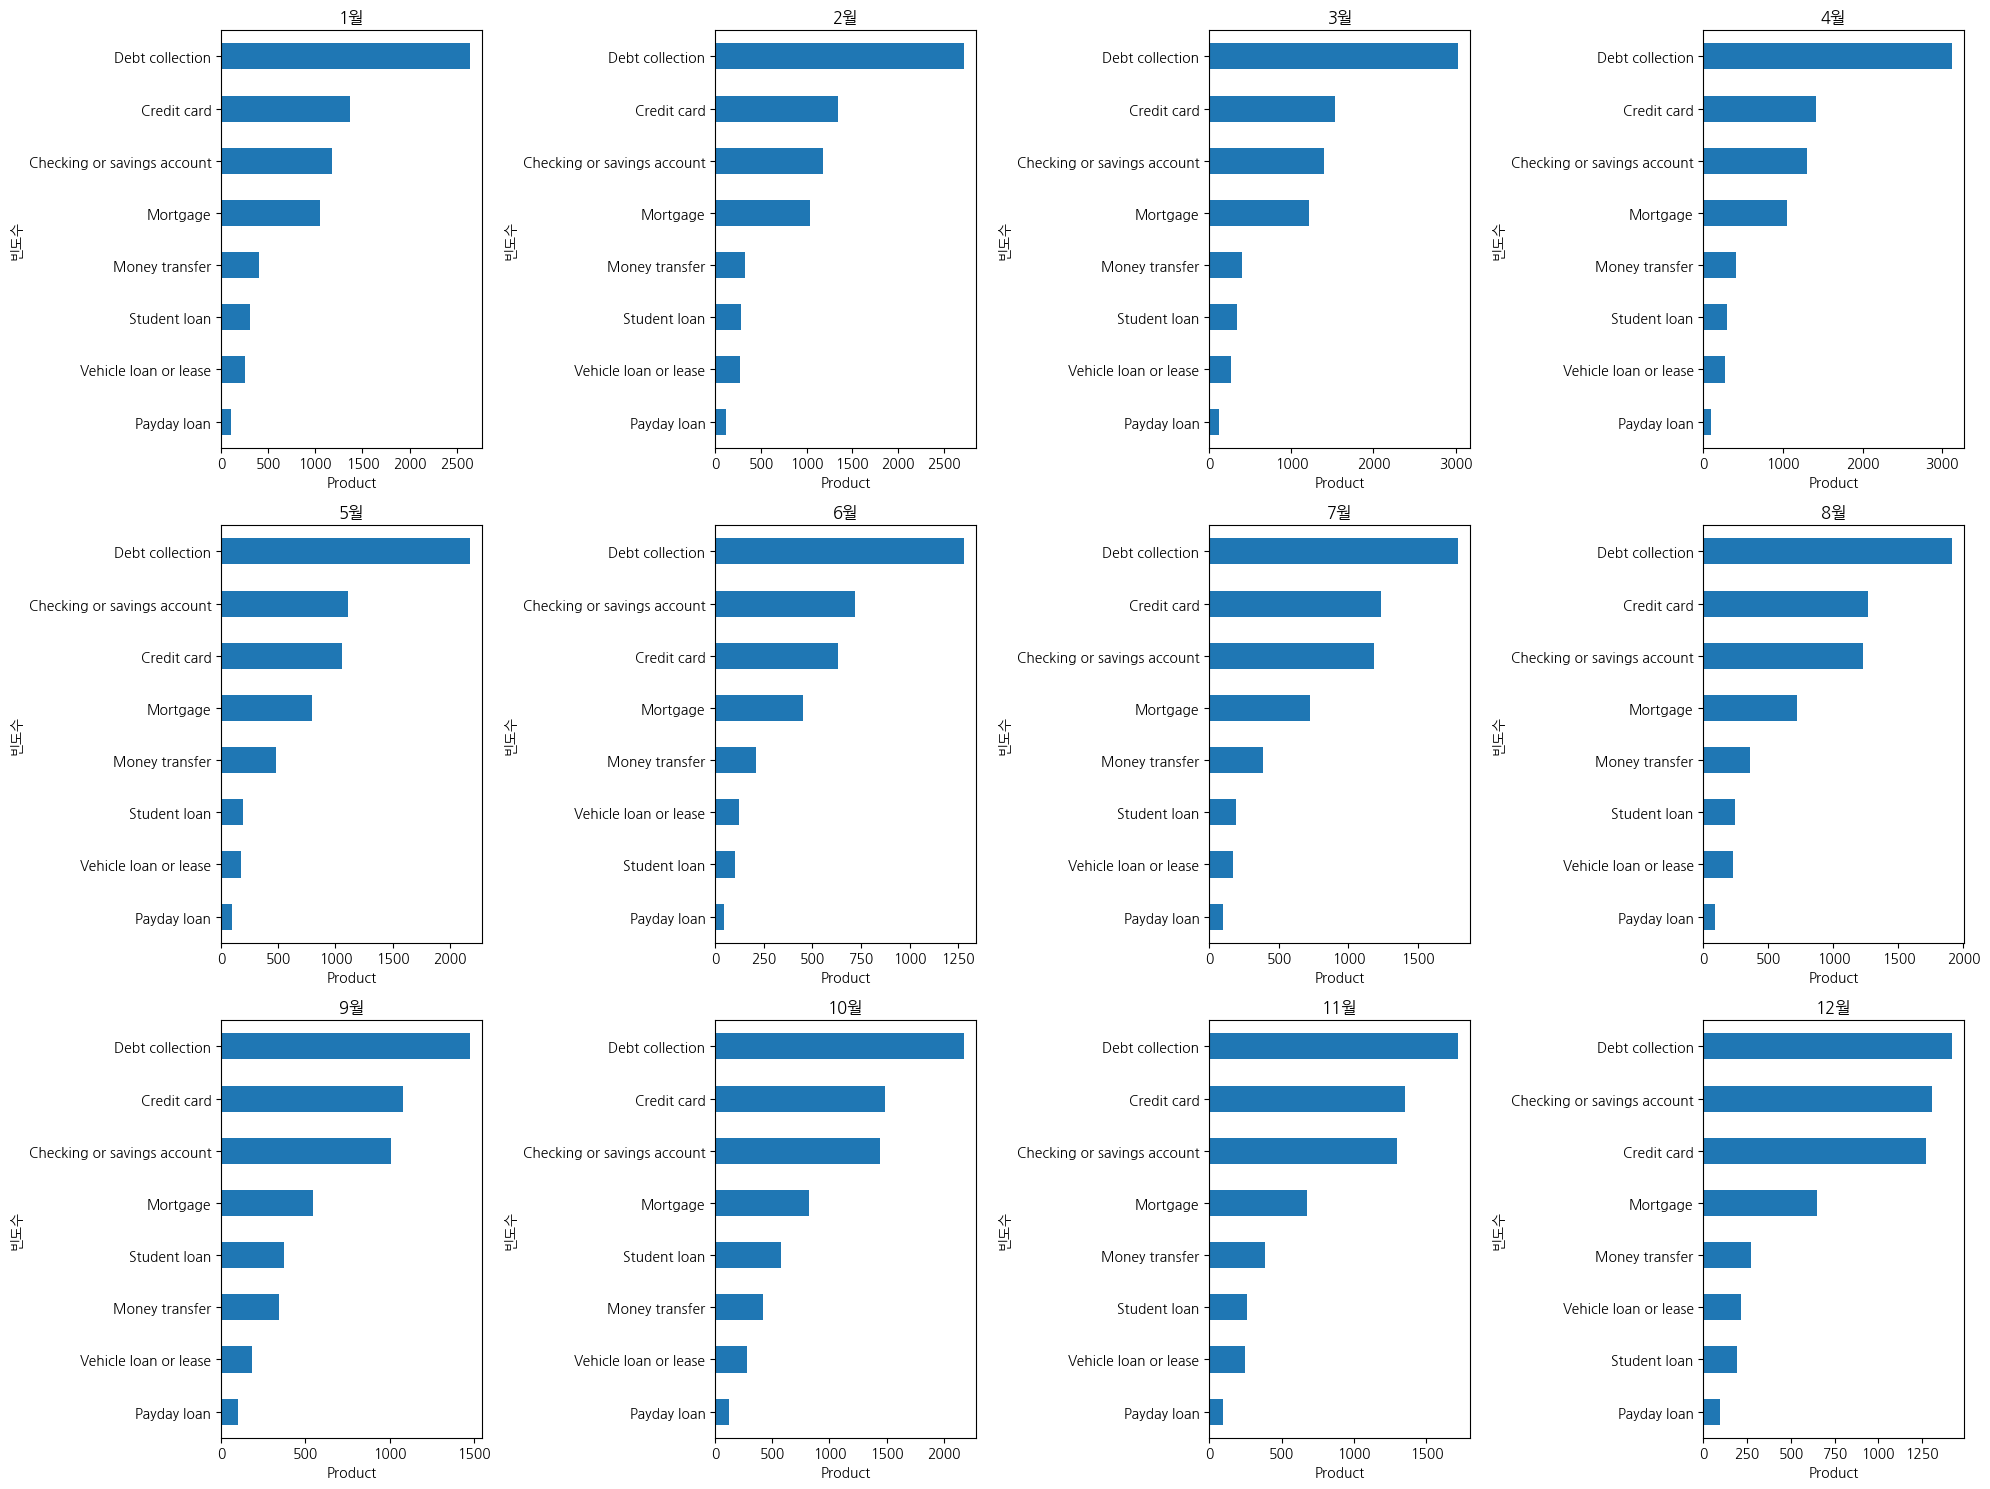

In [ ]:
# Credit reporting을 제외한 결과
K_1 = K.drop(columns = ['Credit reporting'])
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K_1.index, ax.flatten())):
    K_1.loc[month].sort_values(ascending = True).plot(kind = 'barh',ax =ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout() #그래프 간격
plt.show()

1. 2022년부터 Checking or saving account이 차지하는 총비율이 증가한 것이 눈에 띈다.

### (6) 2023년

In [ ]:
DF_2023M = DF[DF['year'] == 2023]

In [ ]:
K = DF_2023M.groupby('month')['product'].value_counts().unstack()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K.index, ax.flatten())):
    K.loc[month].sort_values(ascending = True).plot(kind='barh', ax=ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout()
plt.show()

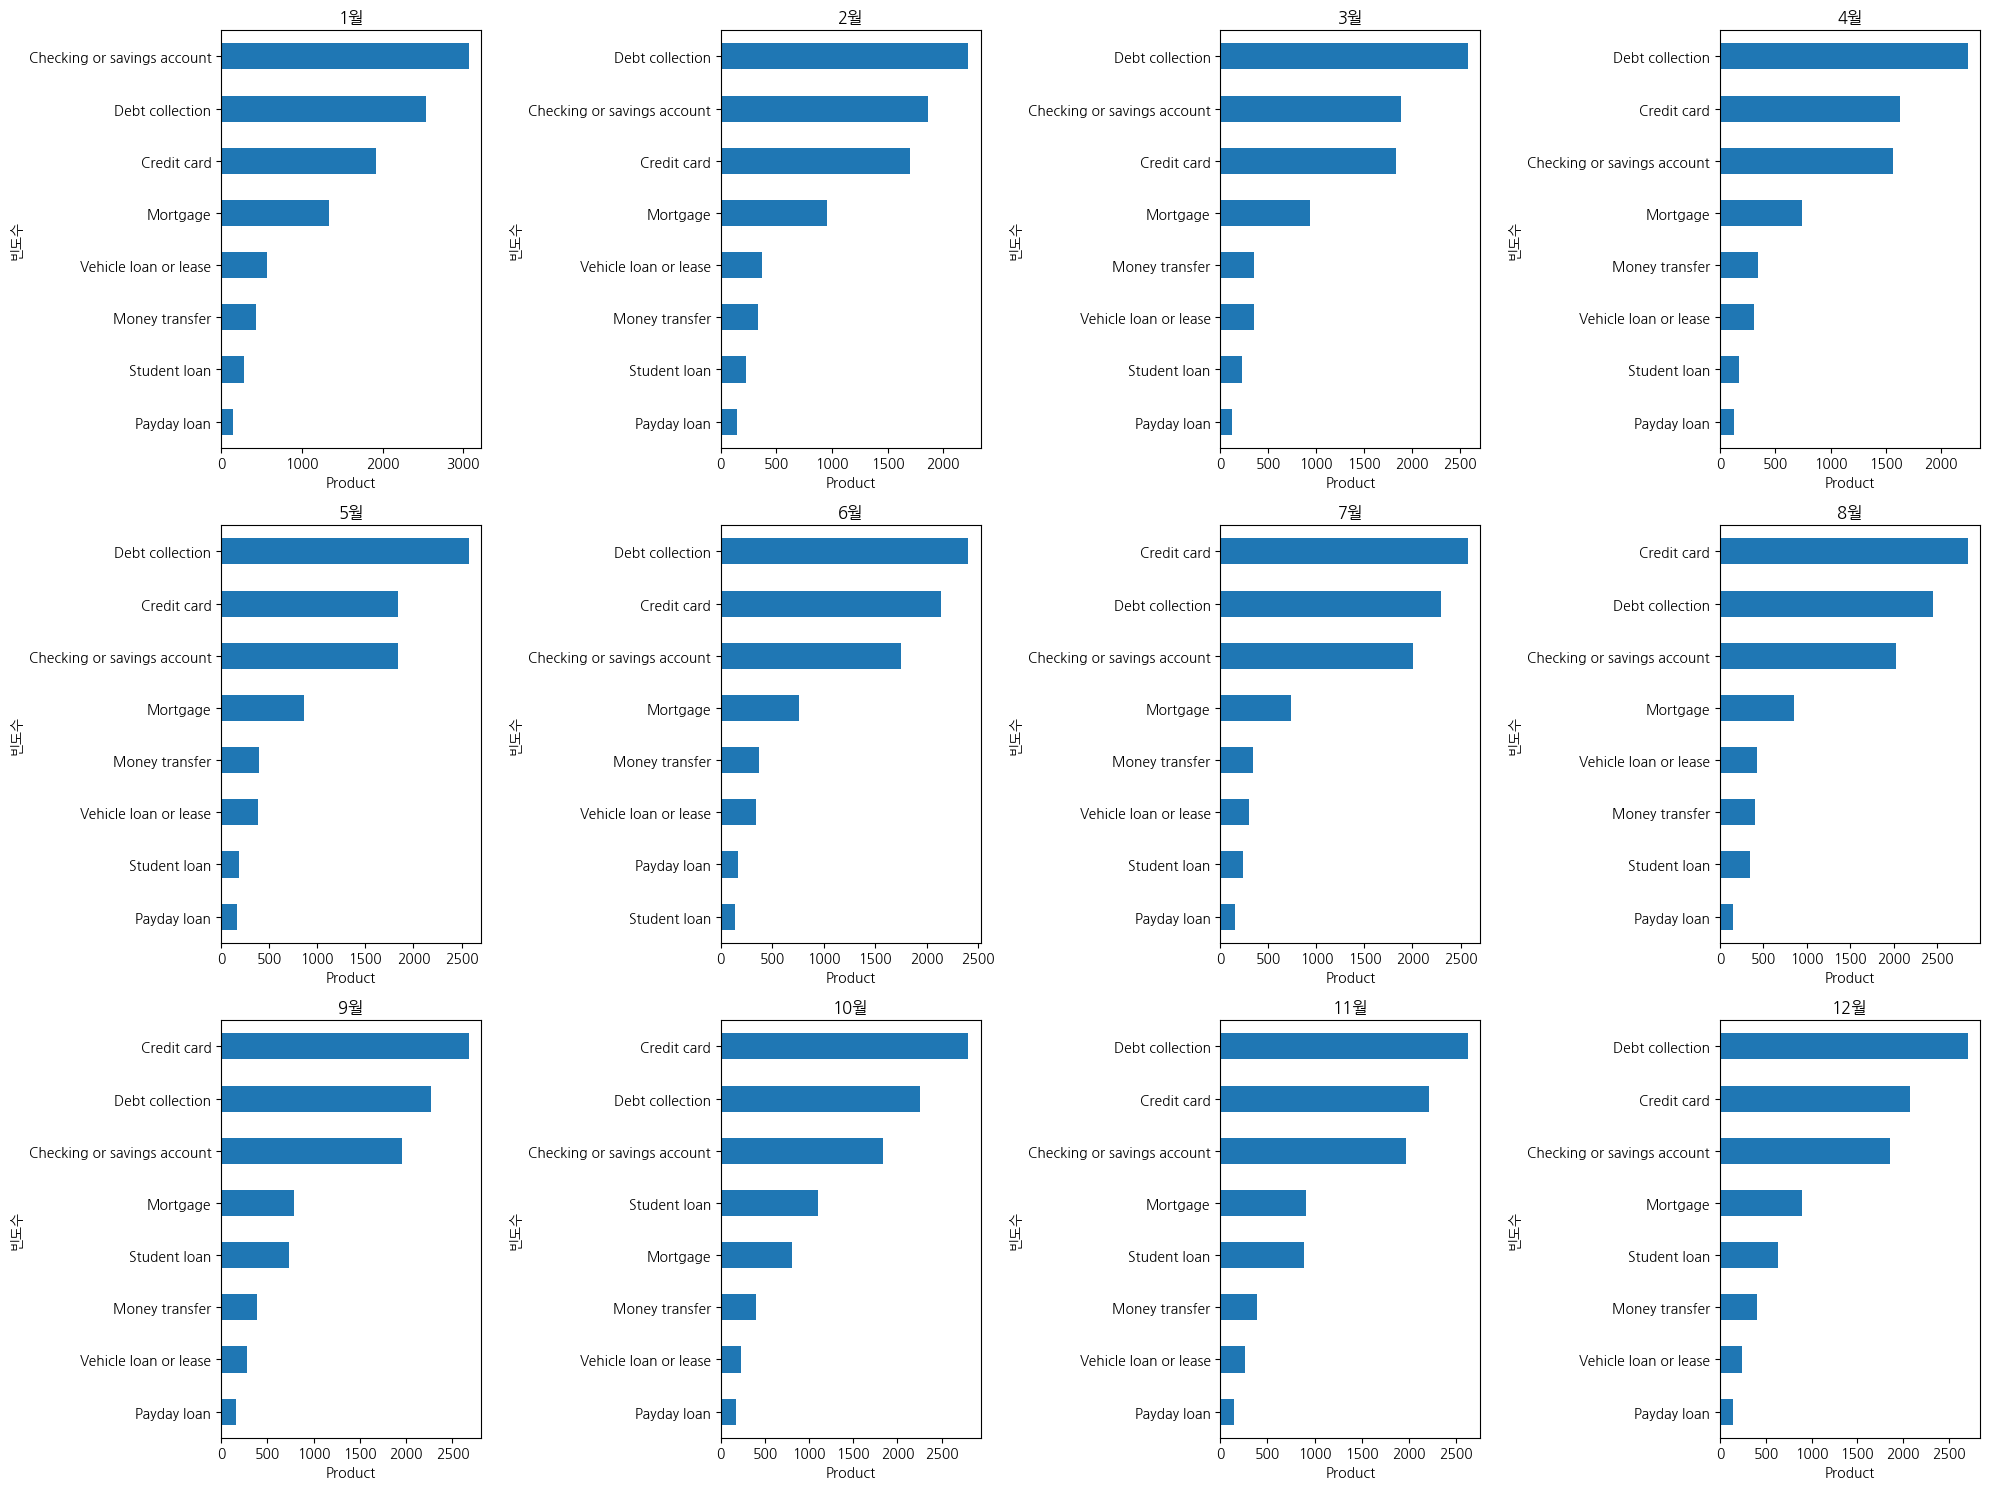

In [ ]:
# Credit reporting을 제외한 결과
K_1 = K.drop(columns = ['Credit reporting'])
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K_1.index, ax.flatten())):
    K_1.loc[month].sort_values(ascending = True).plot(kind = 'barh',ax =ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout() #그래프 간격
plt.show()

1. Credit card가 차지하는 총 비율이 증가한것이 눈에 띈다.

### (7) 2024년

In [ ]:
DF_2024M = DF[DF['year'] == 2024]

In [ ]:
K = DF_2024M.groupby('month')['product'].value_counts().unstack()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K.index, ax.flatten())):
    K.loc[month].sort_values(ascending = True).plot(kind='barh', ax=ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout()
plt.show()

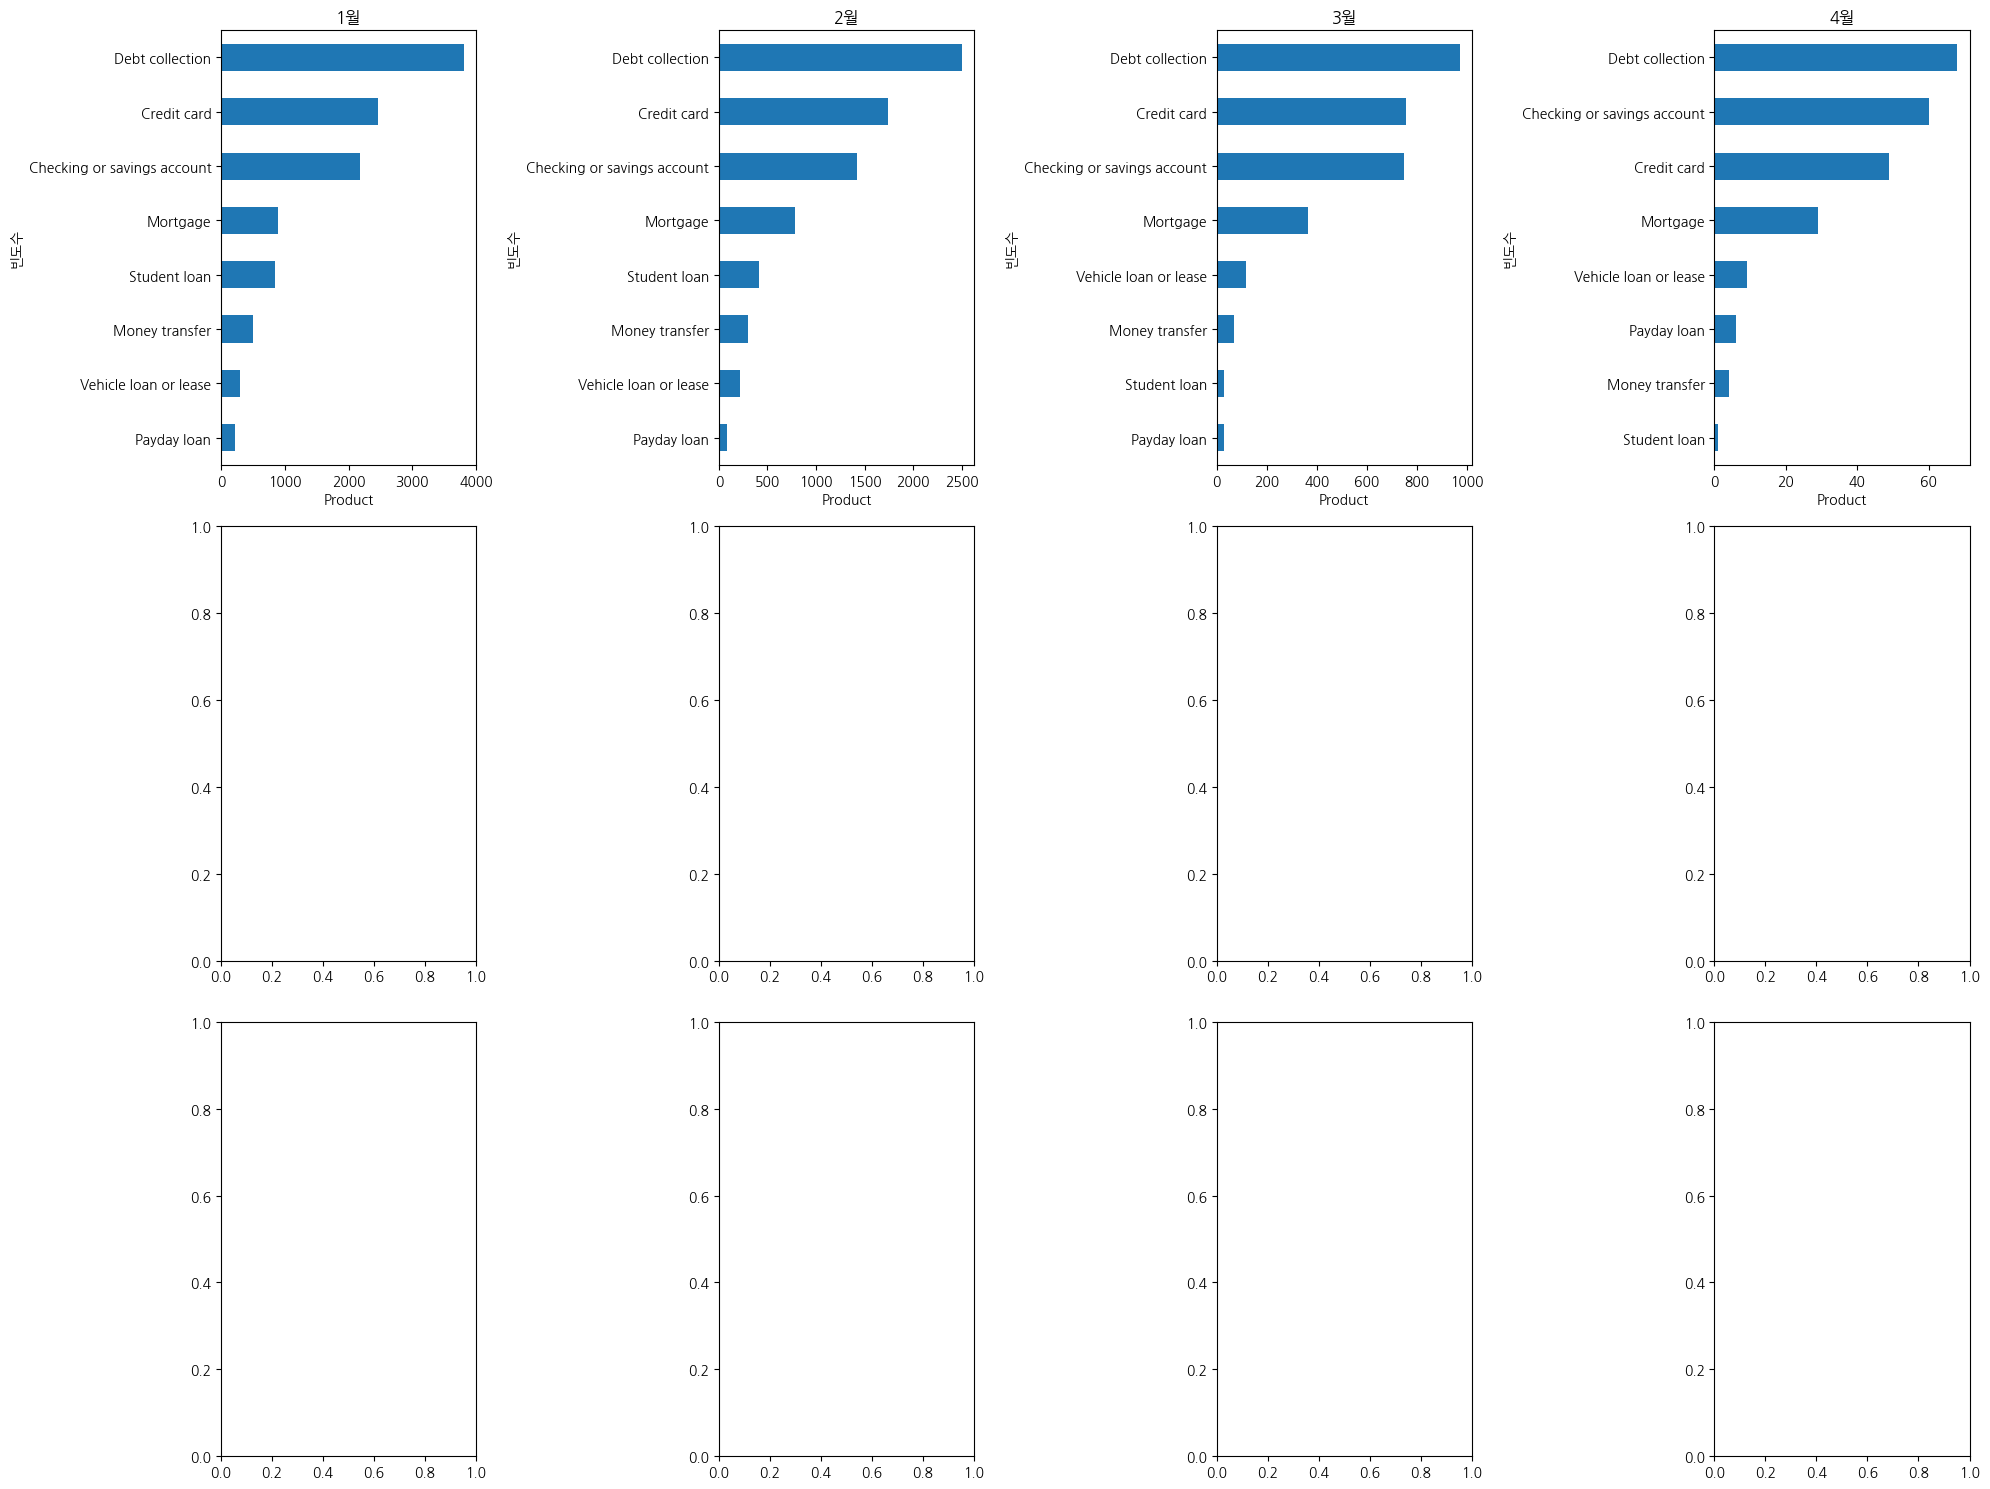

In [ ]:
# Credit reporting을 제외한 결과
K_1 = K.drop(columns = ['Credit reporting'])
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, (month, ax) in enumerate(zip(K_1.index, ax.flatten())):
    K_1.loc[month].sort_values(ascending = True).plot(kind = 'barh',ax =ax)
    ax.set_title(f'{month}월')
    ax.set_ylabel('빈도수')
    ax.set_xlabel('Product')

plt.tight_layout() #그래프 간격
plt.show()

In [ ]:
DF_2019M = DF[DF['year'] == 2019]
DF_2020M = DF[DF['year'] == 2020]
DF_2021M = DF[DF['year'] == 2021]
DF_2022M = DF[DF['year'] == 2022]
DF_2023M = DF[DF['year'] == 2023]
DF_2024M = DF[DF['year'] == 2024]

In [ ]:
DF_2019M['company'].value_counts()

company
EQUIFAX, INC.                             2093
TRANSUNION INTERMEDIATE HOLDINGS, INC.    2028
Experian Information Solutions Inc.       2024
CAPITAL ONE FINANCIAL CORPORATION          467
CITIBANK, N.A.                             460
                                          ... 
Creditor's Collection Service, Inc.          1
Pathfinder Credit Services                   1
Pittenger Law Group, LLC.                    1
FIRST GUARANTY MORTGAGE CORP                 1
MB FINANCIAL, INC.                           1
Name: count, Length: 1134, dtype: int64


1. Experian Information Solutions Inc. 글로벌 정보 서비스 회사로, 주로 신용 보고서 및 신용 점수와 관련된 서비스를 제공

2. TRANSUNION INTERMEDIATE HOLDINGS, INC.
신용 정보 기관으로, 신용 보고서 및 관련 서비스를 제공

3. EQUIFAX, INC. 미국의 큰 신용 정보 기관 중 하나이며, 소비자들의 신용 보고서 및 신용 점수를 제공

4. CAPITAL ONE FINANCIAL CORPORATION 미국의 은행 및 금융 기업으로, 신용카드와 자동차 대출 등의 금융 제품을 제공

5. CITIBANK, N.A.
   CITIBANK, N.A.은 미국의 대형 은행으로 신용카드, 은행 계좌 및 다양한 금융 서비스를 제공

In [ ]:
DF_2020M['company'].value_counts()

company
Experian Information Solutions Inc.          3606
TRANSUNION INTERMEDIATE HOLDINGS, INC.       3064
EQUIFAX, INC.                                3003
CAPITAL ONE FINANCIAL CORPORATION             525
CITIBANK, N.A.                                513
                                             ... 
Merchants Credit Bureau, Inc.                   1
Scott Kroner PLC                                1
Liberty Holdings, LLC                           1
Credit Card Receivables Fund Incorporated       1
CADENCE BANCORPORATION                          1
Name: count, Length: 1130, dtype: int64

In [ ]:
DF_2021M['company'].value_counts()

company
EQUIFAX, INC.                                                   8089
TRANSUNION INTERMEDIATE HOLDINGS, INC.                          4974
Experian Information Solutions Inc.                             3766
CAPITAL ONE FINANCIAL CORPORATION                               1121
BANK OF AMERICA, NATIONAL ASSOCIATION                            973
                                                                ... 
HGREG.com                                                          1
NEW YORK STATE HIGHER EDUCATION SERVICES CORPORATION (HESC)—       1
Law Office of Rory W. Clark, APLC                                  1
Razor Capital, LLC                                                 1
Albert Corporation                                                 1
Name: count, Length: 1533, dtype: int64

In [ ]:
DF_2022M['company'].value_counts()

company
TRANSUNION INTERMEDIATE HOLDINGS, INC.      8964
Experian Information Solutions Inc.         8063
EQUIFAX, INC.                               7487
CAPITAL ONE FINANCIAL CORPORATION            662
BANK OF AMERICA, NATIONAL ASSOCIATION        646
                                            ... 
Thunderbird Collection Specialists, Inc.       1
Law Office of Michael J. Scott, PC             1
Kason Credit Corporation                       1
The Law Office of Nicole Hillman               1
CENTRAL BANCOMPANY, INC                        1
Name: count, Length: 910, dtype: int64

In [ ]:
DF_2023M['company'].value_counts()

company
TRANSUNION INTERMEDIATE HOLDINGS, INC.    41715
EQUIFAX, INC.                             38730
Experian Information Solutions Inc.       38184
WELLS FARGO & COMPANY                      2998
JPMORGAN CHASE & CO.                       2692
                                          ...  
National Check Resolution Inc.                1
Southern Oregon Credit Service, Inc.          1
Flandreau Santee Sioux Tribe                  1
ARP & Associates LLC                          1
STELLAR BANCORP INC.                          1
Name: count, Length: 1846, dtype: int64

In [ ]:
DF_2024M['company'].value_counts()

company
TRANSUNION INTERMEDIATE HOLDINGS, INC.    20640
Experian Information Solutions Inc.       11937
EQUIFAX, INC.                             11103
WELLS FARGO & COMPANY                      1308
CITIBANK, N.A.                             1057
                                          ...  
Independence Capital Recovery, LLC            1
GREENSTATE CREDIT UNION                       1
Healthcare Collections-I, LLC                 1
Gordon, Aylworth & Tami, P.C.                 1
BUSEY BANK                                    1
Name: count, Length: 1158, dtype: int64

In [ ]:
A_2019M = A[A['year'] == 2019]
A_2020M = A[A['year'] == 2020]
A_2021M = A[A['year'] == 2021]
A_2022M = A[A['year'] == 2022]
A_2023M = A[A['year'] == 2023]
A_2024M = A[A['year'] == 2024]

In [ ]:
A_2019M['Company'].value_counts()

Company
EQUIFAX, INC.                             16504
TRANSUNION INTERMEDIATE HOLDINGS, INC.    14855
Experian Information Solutions Inc.       14626
CAPITAL ONE FINANCIAL CORPORATION          3692
JPMORGAN CHASE & CO.                       3422
                                          ...  
Jzanus Ltd.                                   1
M.L. Zager P.C.                               1
National Credit Processing Inc.               1
COMPUTER SCIENCES CORPORATION                 1
Collection Service Center, Inc.               1
Name: count, Length: 2573, dtype: int64

In [ ]:
A_2020M['Company'].value_counts()

Company
Experian Information Solutions Inc.                   27690
EQUIFAX, INC.                                         24789
TRANSUNION INTERMEDIATE HOLDINGS, INC.                24743
CAPITAL ONE FINANCIAL CORPORATION                      4900
CITIBANK, N.A.                                         4452
                                                      ...  
Motormax Financial Services Inc.                          1
Rate Plus, Inc.                                           1
Finance of America Mortgage LLC                           1
The Accounts Retrievable System, Inc.                     1
Oliver Adjustment Company of Kenosha & Racine, Inc        1
Name: count, Length: 2654, dtype: int64

In [ ]:
A_2021M['Company'].value_counts()

Company
EQUIFAX, INC.                             39500
TRANSUNION INTERMEDIATE HOLDINGS, INC.    23289
Experian Information Solutions Inc.       17625
CAPITAL ONE FINANCIAL CORPORATION          5854
JPMORGAN CHASE & CO.                       4972
                                          ...  
RSR & ASSOCIATES INC.                         1
Falls Collection Service Inc.                 1
Evelyn Financial Services                     1
Credit Associates, Inc. (MO)                  1
Brown Olcott, PLLC                            1
Name: count, Length: 2795, dtype: int64

In [ ]:
A_2022M['Company'].value_counts()

Company
TRANSUNION INTERMEDIATE HOLDINGS, INC.    58451
EQUIFAX, INC.                             57143
Experian Information Solutions Inc.       56316
CAPITAL ONE FINANCIAL CORPORATION          5492
BANK OF AMERICA, NATIONAL ASSOCIATION      5082
                                          ...  
AutoMoney, Inc.                               1
Hirshberg Acceptance Corporation              1
Cornerstone First Mortgage, Inc.              1
Pintor Partners, LP                           1
Corpra Care, Inc.                             1
Name: count, Length: 2575, dtype: int64

In [ ]:
A_2023M['Company'].value_counts()

Company
TRANSUNION INTERMEDIATE HOLDINGS, INC.           95752
EQUIFAX, INC.                                    91619
Experian Information Solutions Inc.              89371
WELLS FARGO & COMPANY                             9458
CAPITAL ONE FINANCIAL CORPORATION                 7344
                                                 ...  
Rhame, Elwood & McClure PC                           1
National Capital Solutions                           1
STELLAR BANCORP INC.                                 1
New Hampshire Northeast Credit Services, Inc.        1
Surepay Lending Group LLC                            1
Name: count, Length: 2725, dtype: int64

In [ ]:
A_2024M['Company'].value_counts()

Company
TRANSUNION INTERMEDIATE HOLDINGS, INC.    23701
Experian Information Solutions Inc.       15152
EQUIFAX, INC.                             14636
WELLS FARGO & COMPANY                      1717
CITIBANK, N.A.                             1504
                                          ...  
Crown Holdings, LLC                           1
Cass & Associates                             1
INTEGRAL RECOVERIES, INC.                     1
FlexShopper, Inc                              1
Amscot Corporation                            1
Name: count, Length: 1444, dtype: int64